**Agoda Case Study**

This is the Jupyter Notebook for analyzing the Agoda Case Study.

**Introduction**

Most of the time, the primary goal of launching a new feature on Agoda website is to increase the number of bookings. One way to increase the number of bookings and conversion rate is to encourage customers to complete their booking as fast as possible. The call to action message that helps us to achieve that is internally known as an ‘urgency message’.

A Product Owner (PO) would like to implement an urgency message on the website such as
* “Prices have been rising. Book now to lock in your rates!” 
* “Your check-in is fast approaching. Book now to lock in your rates!”

**Goal: He/she is requesting you to perform an analysis in order to understand the movement of the price as the day approaches the check-in date.**
Attached is a randomly sampled booking data from five different cities with check-in between 10/10/2016 – 12/31/2016.

Some things to think about
* At which part of the funnel should this message be implemented? On a homepage, search results page, at the property level, or booking form? 
* What assumptions are you making about the data? 
* What factors play a role on price in this analysis? 
* What other factors may influence the analysis that isn’t available in the dataset? What would improve the analysis? 
* What conclusions can you draw from the data? 
* What recommendations would you give to the Product Owner?

Data Dictionary
<br>
'#' - No of record in each dataset<br>
ADR – Average Daily Rate in US Dollars (Customer Total Amount / Room Nights)<br>
Hotel ID – Property identification number<br>
City ID – City identification number<br>
Star rating – Property’s star rating<br>
Accommodation Type Name – Property’s accommodation type<br>
Chain Hotel – Indicates whether the property is part of a chain or not<br>
Booking date – Date of booking made<br>
Check-in date – Date of check-in<br>
Check-out date – Date of check-out<br>

In [3]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [75]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
exA = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx', sheet_name = 'City_A')
exB = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx', sheet_name = 'City_B')
exC = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx', sheet_name = 'City_C')
exD = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx', sheet_name = 'City_D')
exE = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx', sheet_name = 'City_E')

In [7]:
exA.head(5)
# exB.tail(5)

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,booking_month,checkin_month,booked_days_ahead,bookdays_int,day_of_week
0,1,71.06,297388,9395,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,8,10,60 days,60,Saturday
1,2,76.56,298322,9395,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,8,10,60 days,60,Saturday
2,3,153.88,2313076,9395,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,8,10,60 days,60,Saturday
3,4,126.60,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,8,10,59 days,59,Sunday
4,5,115.08,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,8,10,59 days,59,Sunday


Adding some useful columns in the dataframe for all 5 cities.

In [6]:
exA['booking_month'] = exA['booking_date'].dt.month
exA['checkin_month'] = exA['checkin_date'].dt.month
exA['booked_days_ahead'] = exA['checkin_date'] - exA['booking_date']
exA['bookdays_int'] = exA['booked_days_ahead'].dt.days
exA['day_of_week'] = exA['checkin_date'].dt.day_name()
exA.head()

exB['booking_month'] = exB['booking_date'].dt.month
exB['checkin_month'] = exB['checkin_date'].dt.month
exB['booked_days_ahead'] = exB['checkin_date'] - exB['booking_date']
exB['bookdays_int'] = exB['booked_days_ahead'].dt.days
exB['day_of_week'] = exB['checkin_date'].dt.day_name()
exB.head()

exC['booking_month'] = exC['booking_date'].dt.month
exC['checkin_month'] = exC['checkin_date'].dt.month
exC['booked_days_ahead'] = exC['checkin_date'] - exC['booking_date']
exC['bookdays_int'] = exC['booked_days_ahead'].dt.days
exC['day_of_week'] = exC['checkin_date'].dt.day_name()
exC.head()

exD['booking_month'] = exD['booking_date'].dt.month
exD['checkin_month'] = exD['checkin_date'].dt.month
exD['booked_days_ahead'] = exD['checkin_date'] - exD['booking_date']
exD['bookdays_int'] = exD['booked_days_ahead'].dt.days
exD['day_of_week'] = exD['checkin_date'].dt.day_name()
exD.head()

exE['booking_month'] = exE['booking_date'].dt.month
exE['checkin_month'] = exE['checkin_date'].dt.month
exE['booked_days_ahead'] = exE['checkin_date'] - exE['booking_date']
exE['bookdays_int'] = exE['booked_days_ahead'].dt.days
exE['day_of_week'] = exE['checkin_date'].dt.day_name()
exE.head()

,#,ADR_USD,hotel_id,city_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,booking_month,checkin_month,booked_days_ahead,bookdays_int,day_of_week
0,1,90.60,374026,8584,4.0,Hotel,chain,2016-08-08,2016-10-06,2016-10-07,8,10,59 days,59,Thursday
1,2,65.70,1167514,8584,3.0,Hotel,non-chain,2016-08-09,2016-10-04,2016-10-06,8,10,56 days,56,Tuesday
2,3,73.08,1167514,8584,3.0,Hotel,non-chain,2016-08-09,2016-10-02,2016-10-03,8,10,54 days,54,Sunday
3,4,51.02,217094,8584,3.0,Serviced Apartment,chain,2016-08-10,2016-10-07,2016-10-10,8,10,58 days,58,Friday
4,5,166.16,97014,8584,4.0,Resort,non-chain,2016-08-10,2016-10-01,2016-10-02,8,10,52 days,52,Saturday


Recall the **MAIN Questions** to answer to: <br>
1. **Where** to implement the urgency message? (homepage, search results page, at the property level, or booking form)
2. **When** to start implementing the urgency message?
3. **Which** hotel type to implement urgency message? (non-chain, chain hotel)
4. **Which** accommadation type to implement urgency message? (Resort, Hotel, Guest House)
5. **Time Scale** to implement urgency message? (For holiday season? weekend market?)

**Some Ideas to start with** <br>
Can suggest that **add total numbers of available rooms to book column**. If not many rooms left, deploy urgency message on other hotels which have more rooms available to book to save the resources.

In [8]:
len(exA)
len(exB)
len(exC)
len(exD)
len(exE)

4817

The number of records: <br>
City A: 22366<br>
City B: 4932<br>
City C: 6797<br>
City D: 10152<br>
City E: 4817<br>

Let's just look at one City first. In this case City B for now.

## City C

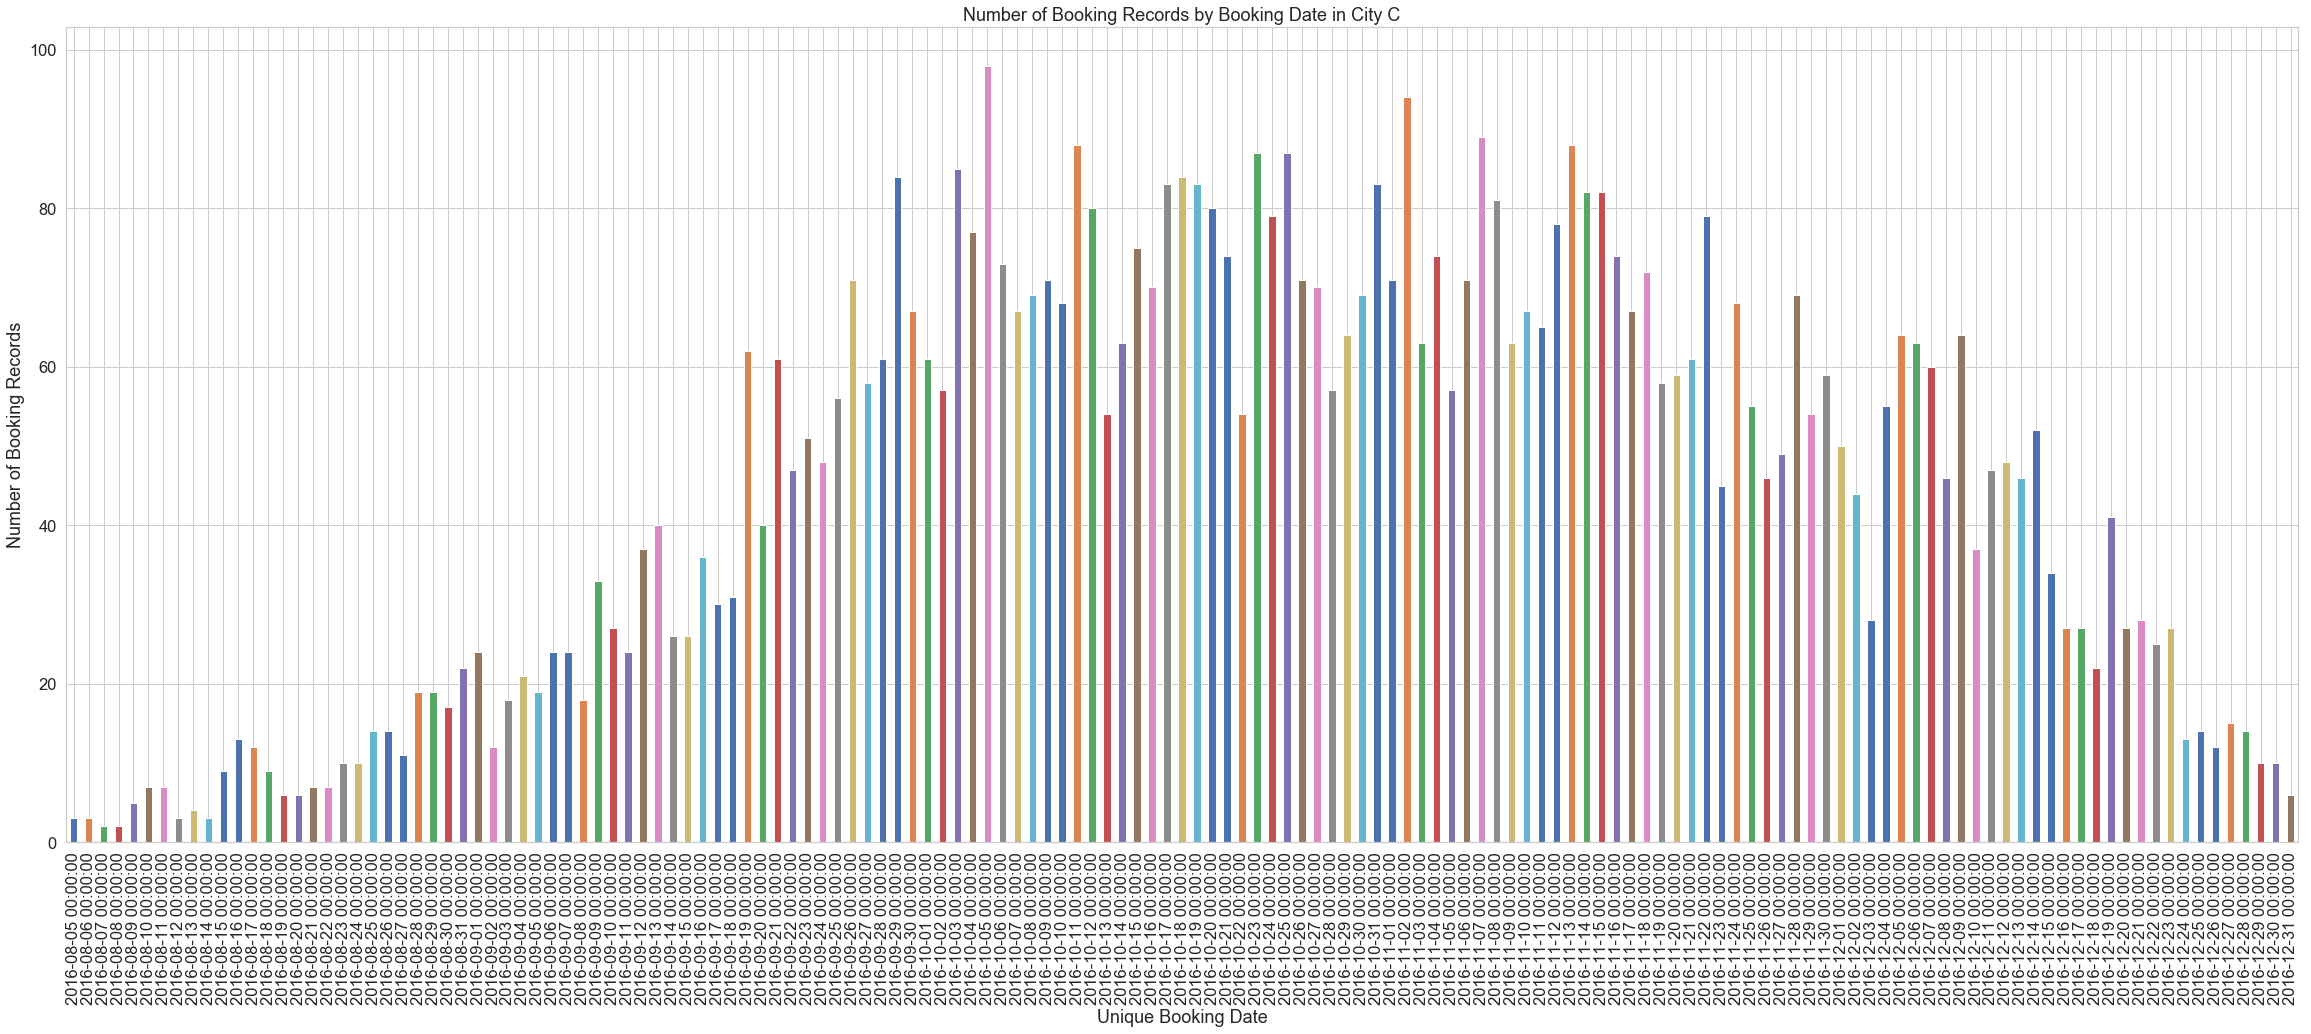

In [15]:
book_date_count_C = exC['booking_date'].groupby([exC['booking_date']]).agg('count')
book_date_count_C

num_book_bookdate_C = plt.figure(figsize=(40, 15))
book_date_count_C.plot(kind="bar")
plt.ylabel("Number of Booking Records")
plt.xlabel("Unique Booking Date")
plt.title("Number of Booking Records by Booking Date in City C");
num_book_bookdate_C.savefig('Pictures/num_book_bookdate_C.png')

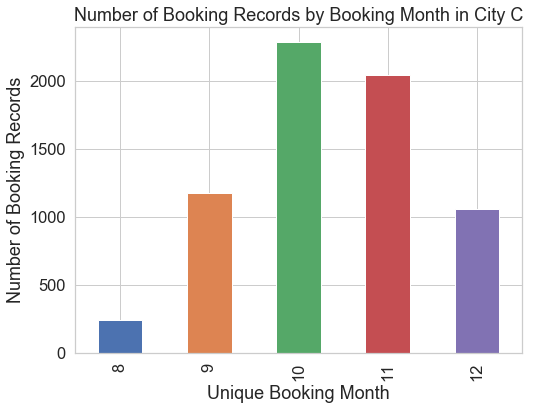

In [21]:
book_month_count_C = exC['booking_date'].groupby([exC['booking_date'].dt.month]).agg('count')
book_month_count_C

num_book_bookmonth_C = plt.figure(figsize=(8, 6))
book_month_count_C.plot(kind="bar")
plt.ylabel("Number of Booking Records")
plt.xlabel("Unique Booking Month")
plt.title("Number of Booking Records by Booking Month in City C");
num_book_bookmonth_C.savefig('Pictures/num_book_bookmonth_C.png')

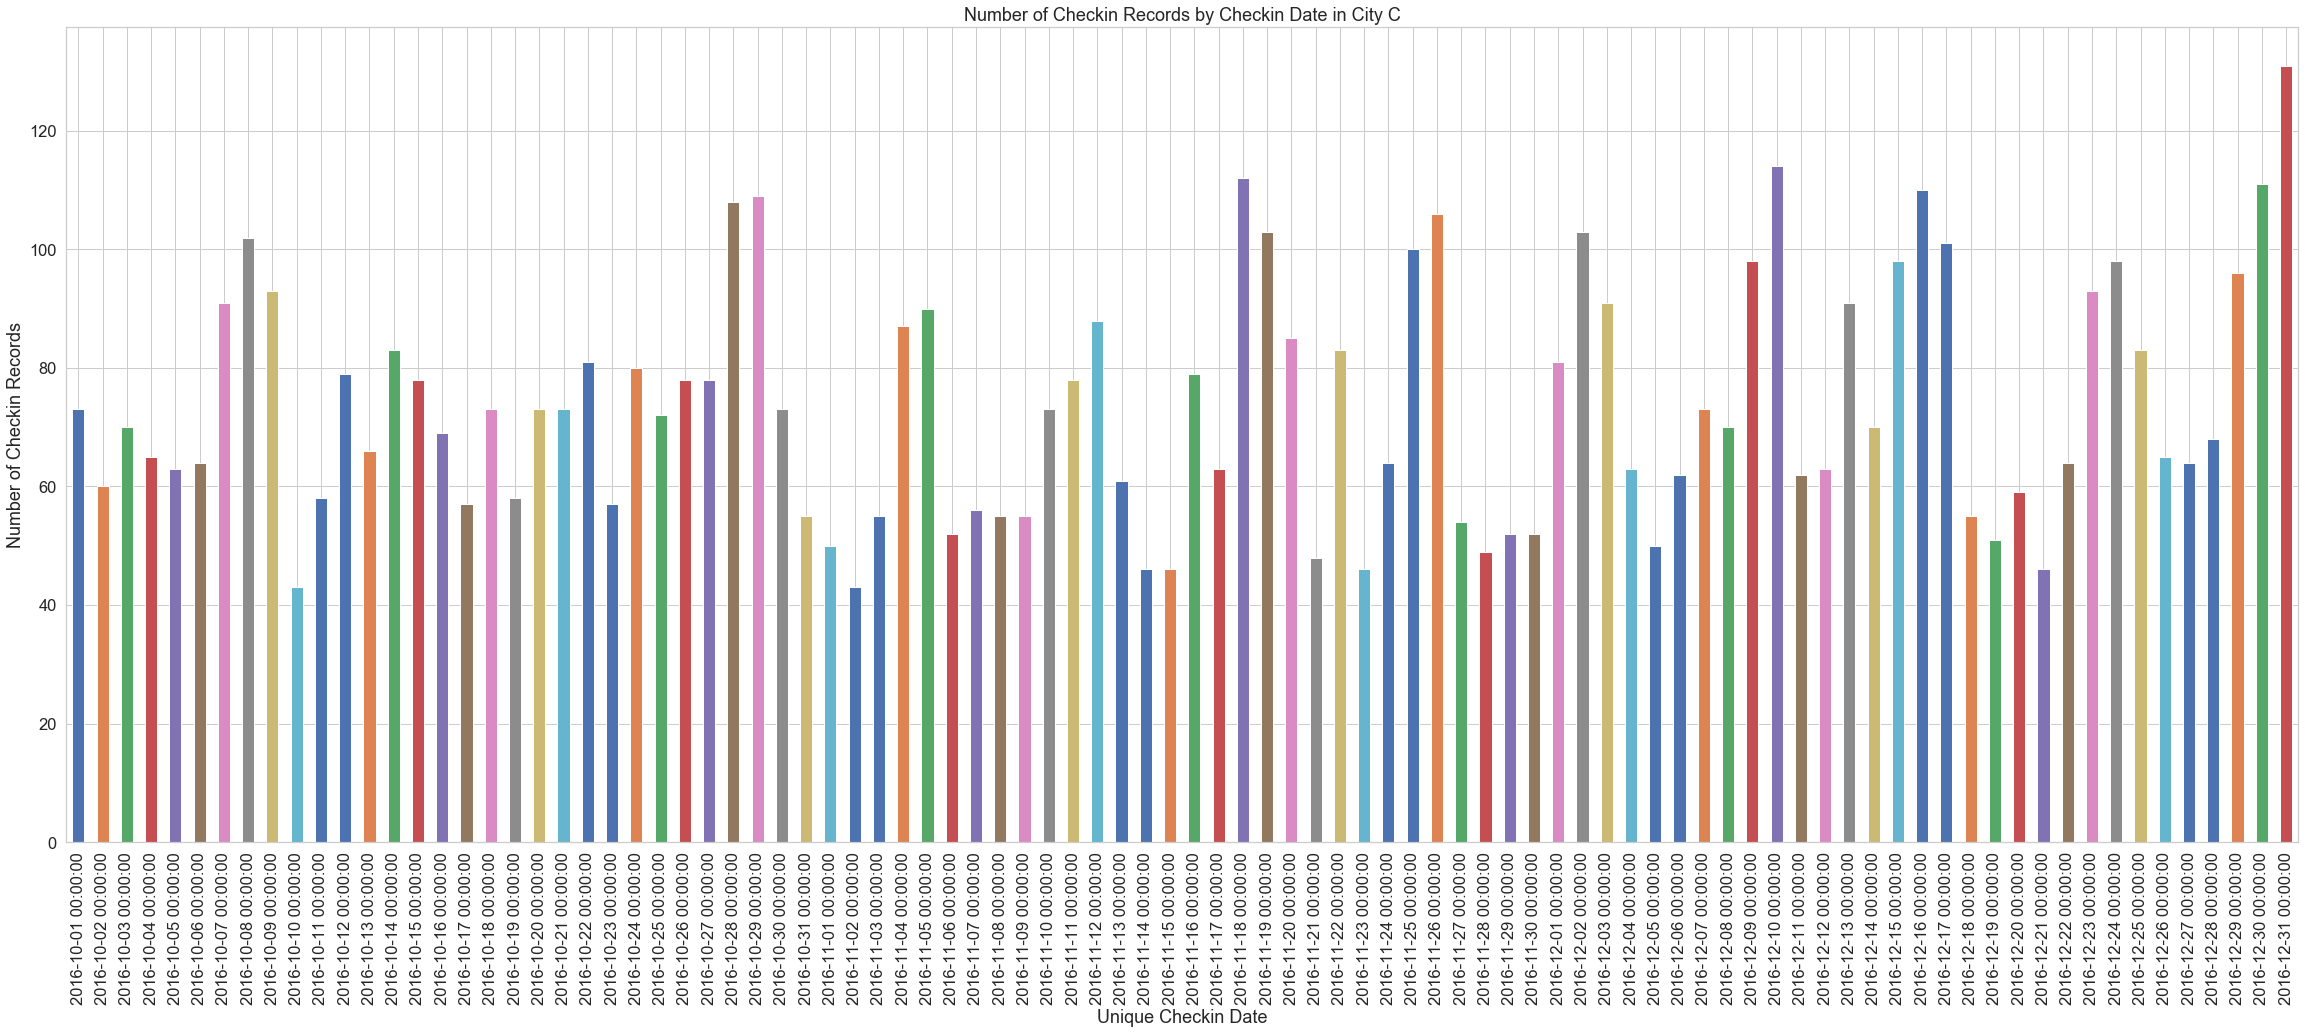

In [35]:
checkin_date_count_C = exC['checkin_date'].groupby([exC['checkin_date']]).agg('count')
checkin_date_count_C

num_book_checkdate_C = plt.figure(figsize=(40, 15))
checkin_date_count_C.plot(kind="bar")
plt.ylabel("Number of Checkin Records")
plt.xlabel("Unique Checkin Date")
plt.title("Number of Checkin Records by Checkin Date in City C");
num_book_checkdate_C.savefig('Pictures/num_book_checkdate_C.png')

## City D

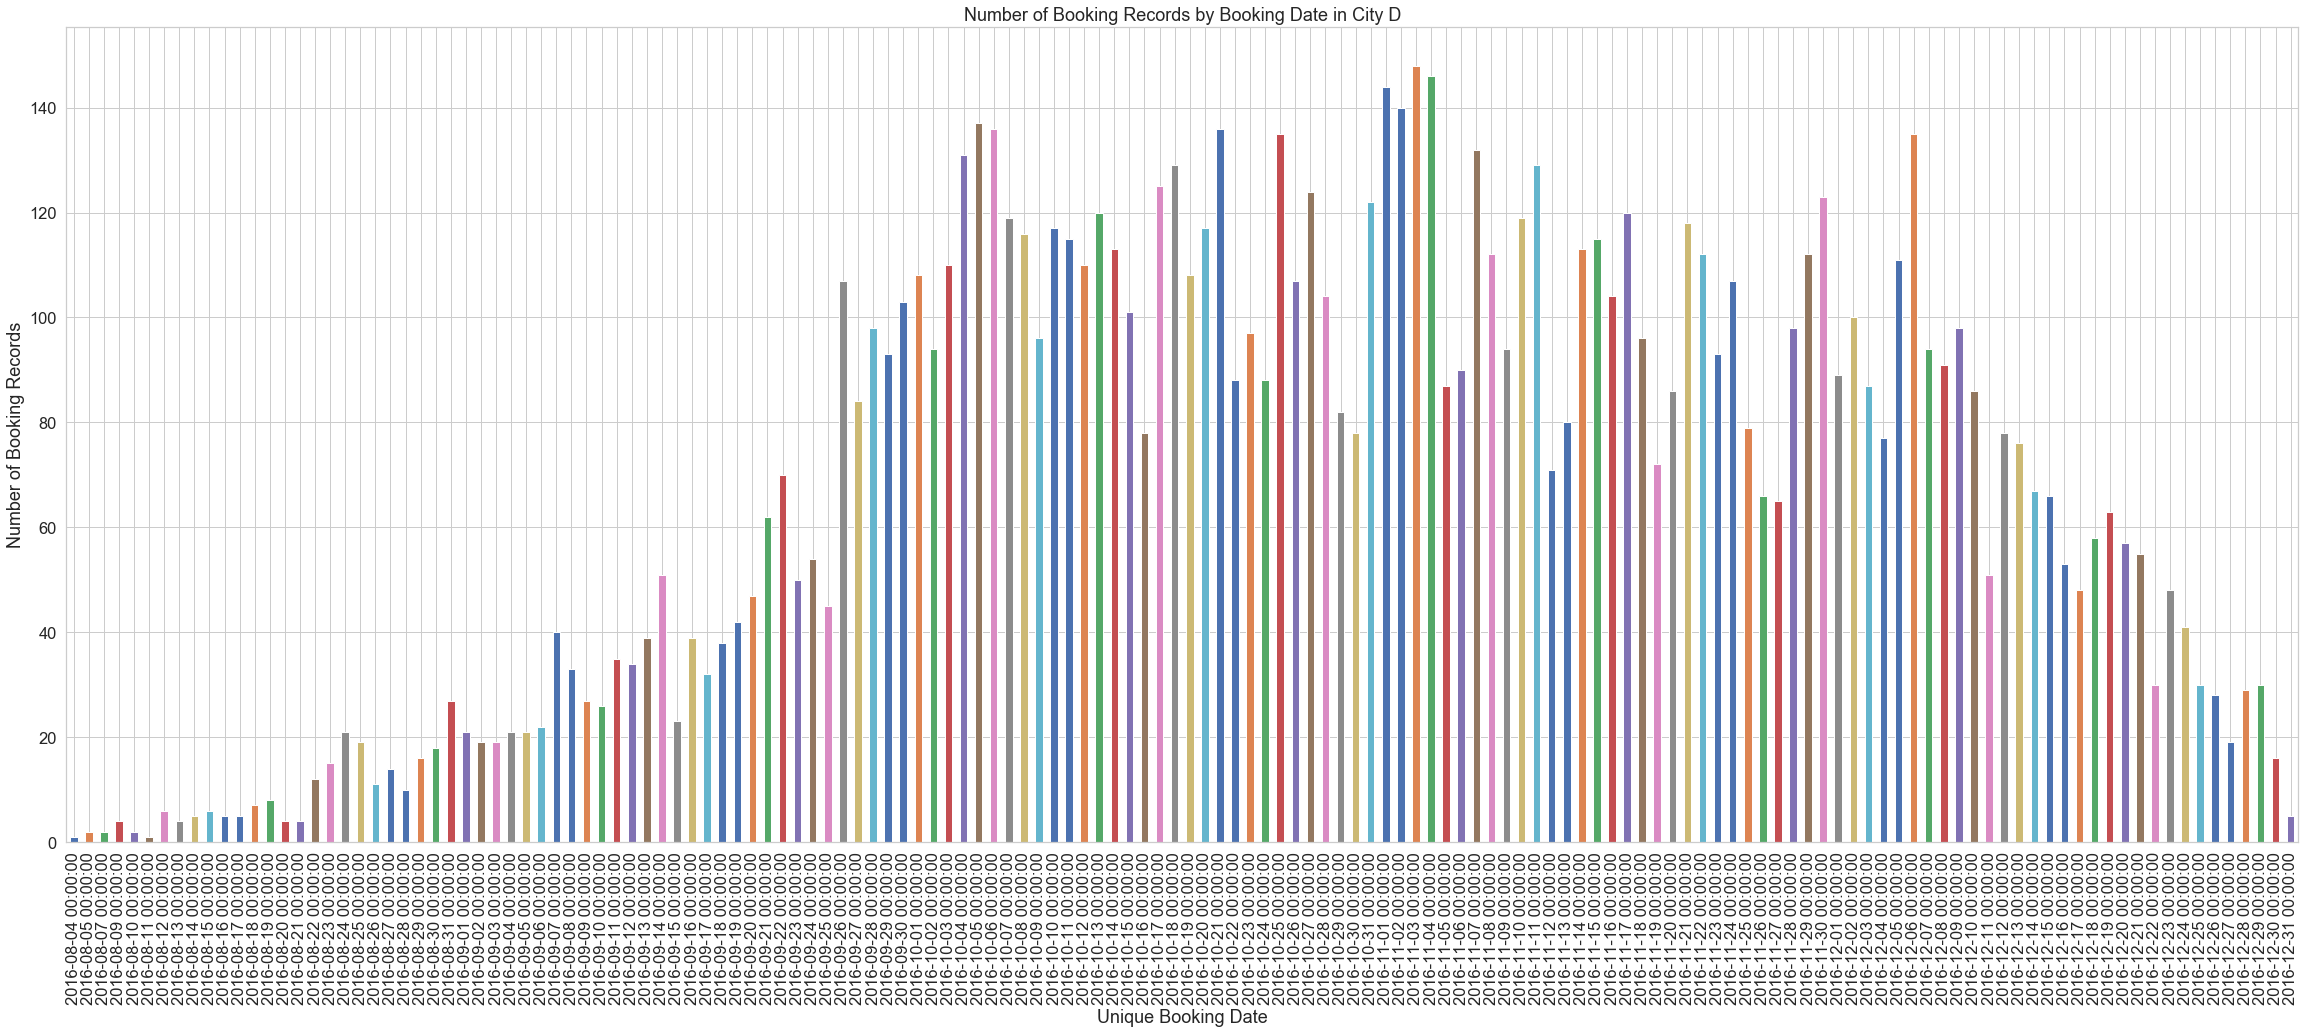

In [16]:
book_date_count_D = exD['booking_date'].groupby([exD['booking_date']]).agg('count')
book_date_count_D

num_book_bookdate_D = plt.figure(figsize=(40, 15))
book_date_count_D.plot(kind="bar")
plt.ylabel("Number of Booking Records")
plt.xlabel("Unique Booking Date")
plt.title("Number of Booking Records by Booking Date in City D");
num_book_bookdate_D.savefig('Pictures/num_book_bookdate_D.png')

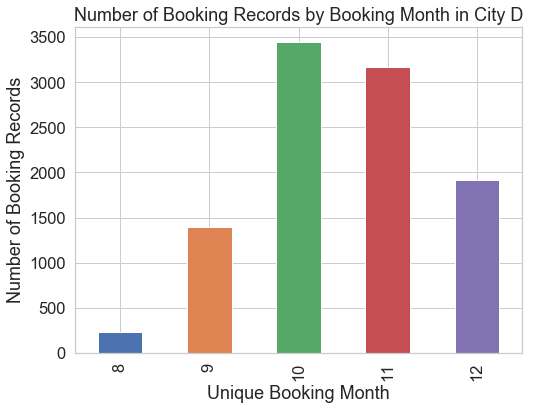

In [23]:
book_month_count_D = exD['booking_date'].groupby([exD['booking_date'].dt.month]).agg('count')
book_month_count_D

num_book_bookmonth_D = plt.figure(figsize=(8, 6))
book_month_count_D.plot(kind="bar")
plt.ylabel("Number of Booking Records")
plt.xlabel("Unique Booking Month")
plt.title("Number of Booking Records by Booking Month in City D");
num_book_bookmonth_D.savefig('Pictures/num_book_bookmonth_D.png')

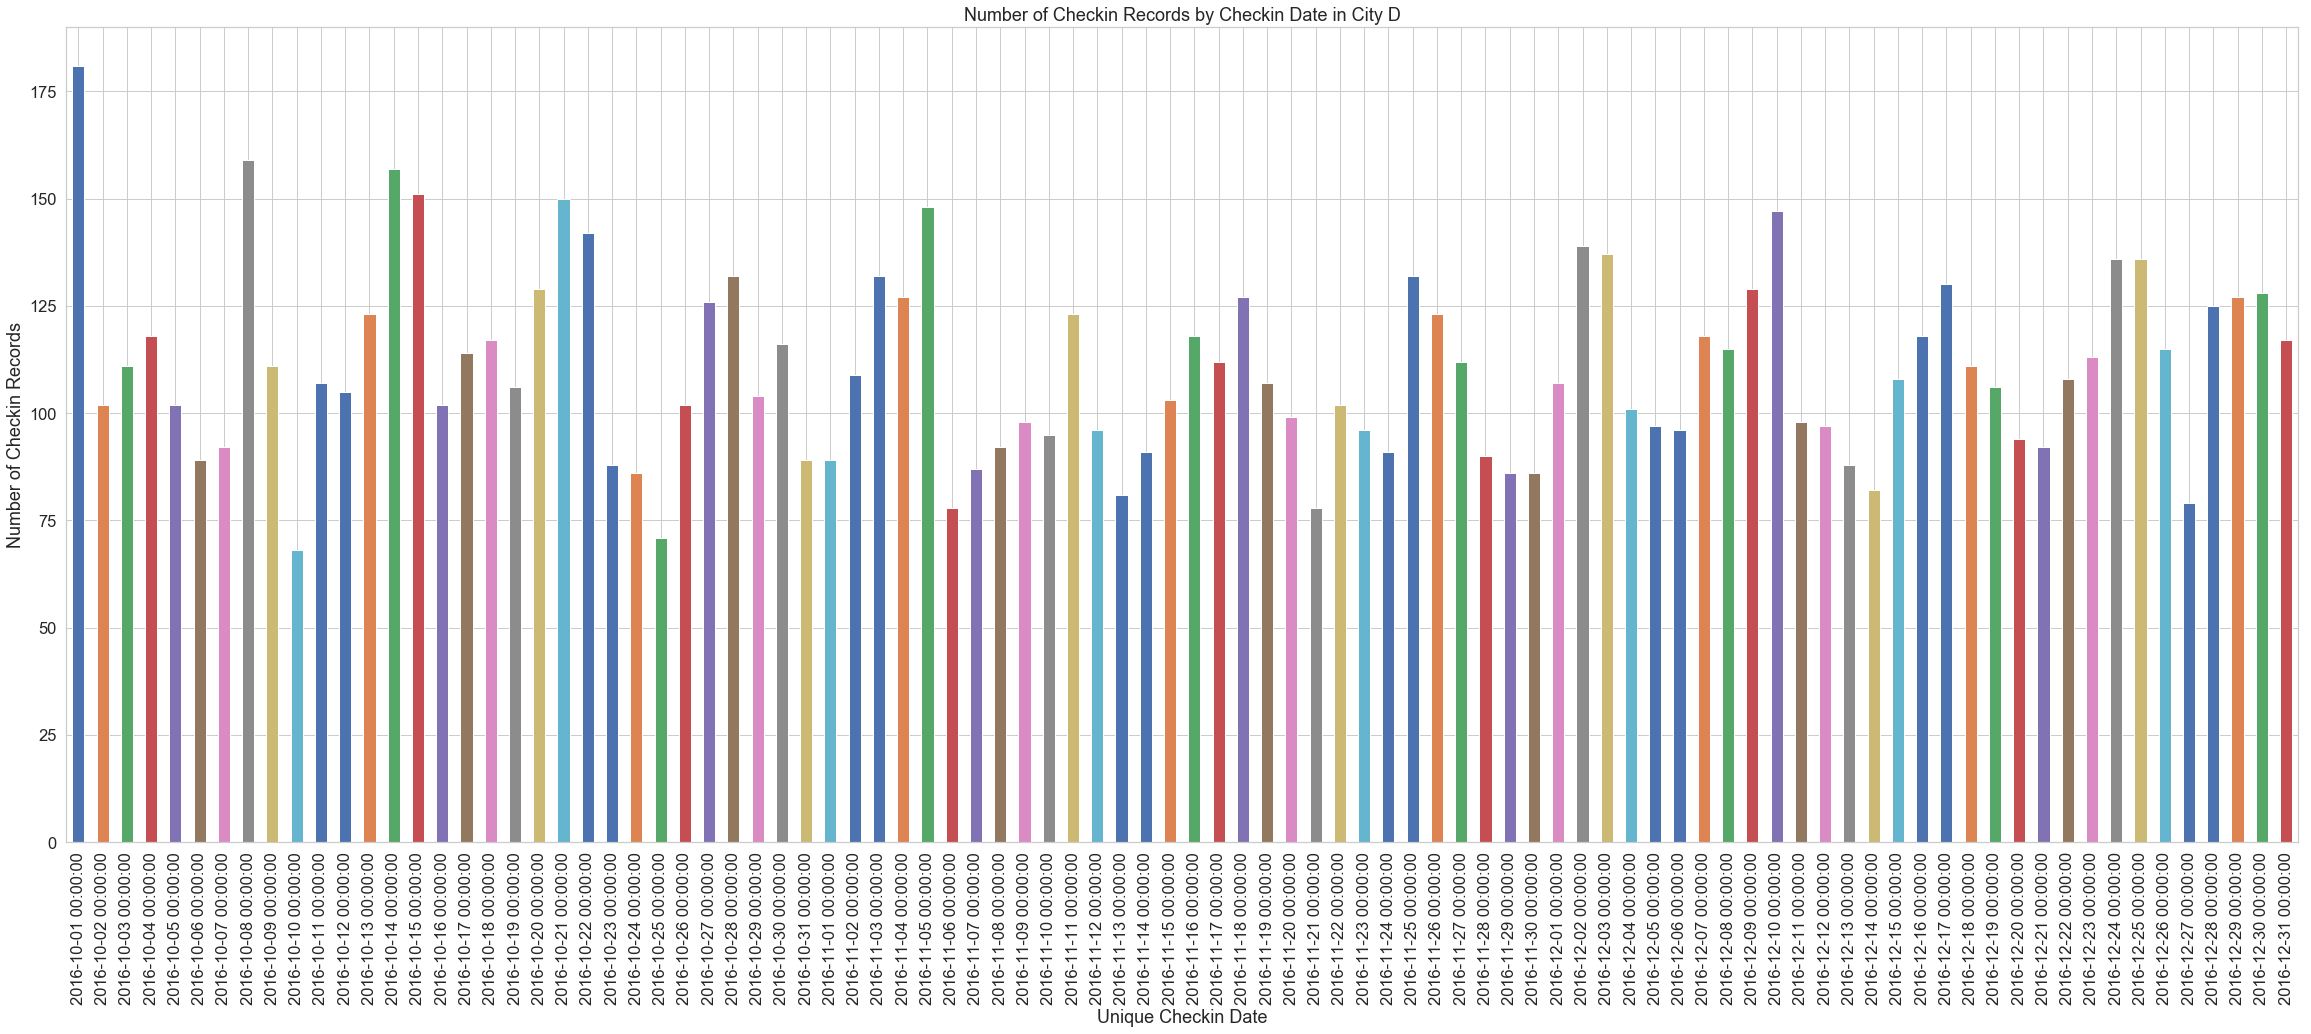

In [34]:
checkin_date_count_D = exD['checkin_date'].groupby([exD['checkin_date']]).agg('count')
checkin_date_count_D

num_book_checkdate_D = plt.figure(figsize=(40, 15))
checkin_date_count_D.plot(kind="bar")
plt.ylabel("Number of Checkin Records")
plt.xlabel("Unique Checkin Date")
plt.title("Number of Checkin Records by Checkin Date in City D");
num_book_checkdate_D.savefig('Pictures/num_book_checkdate_D.png')

## City E

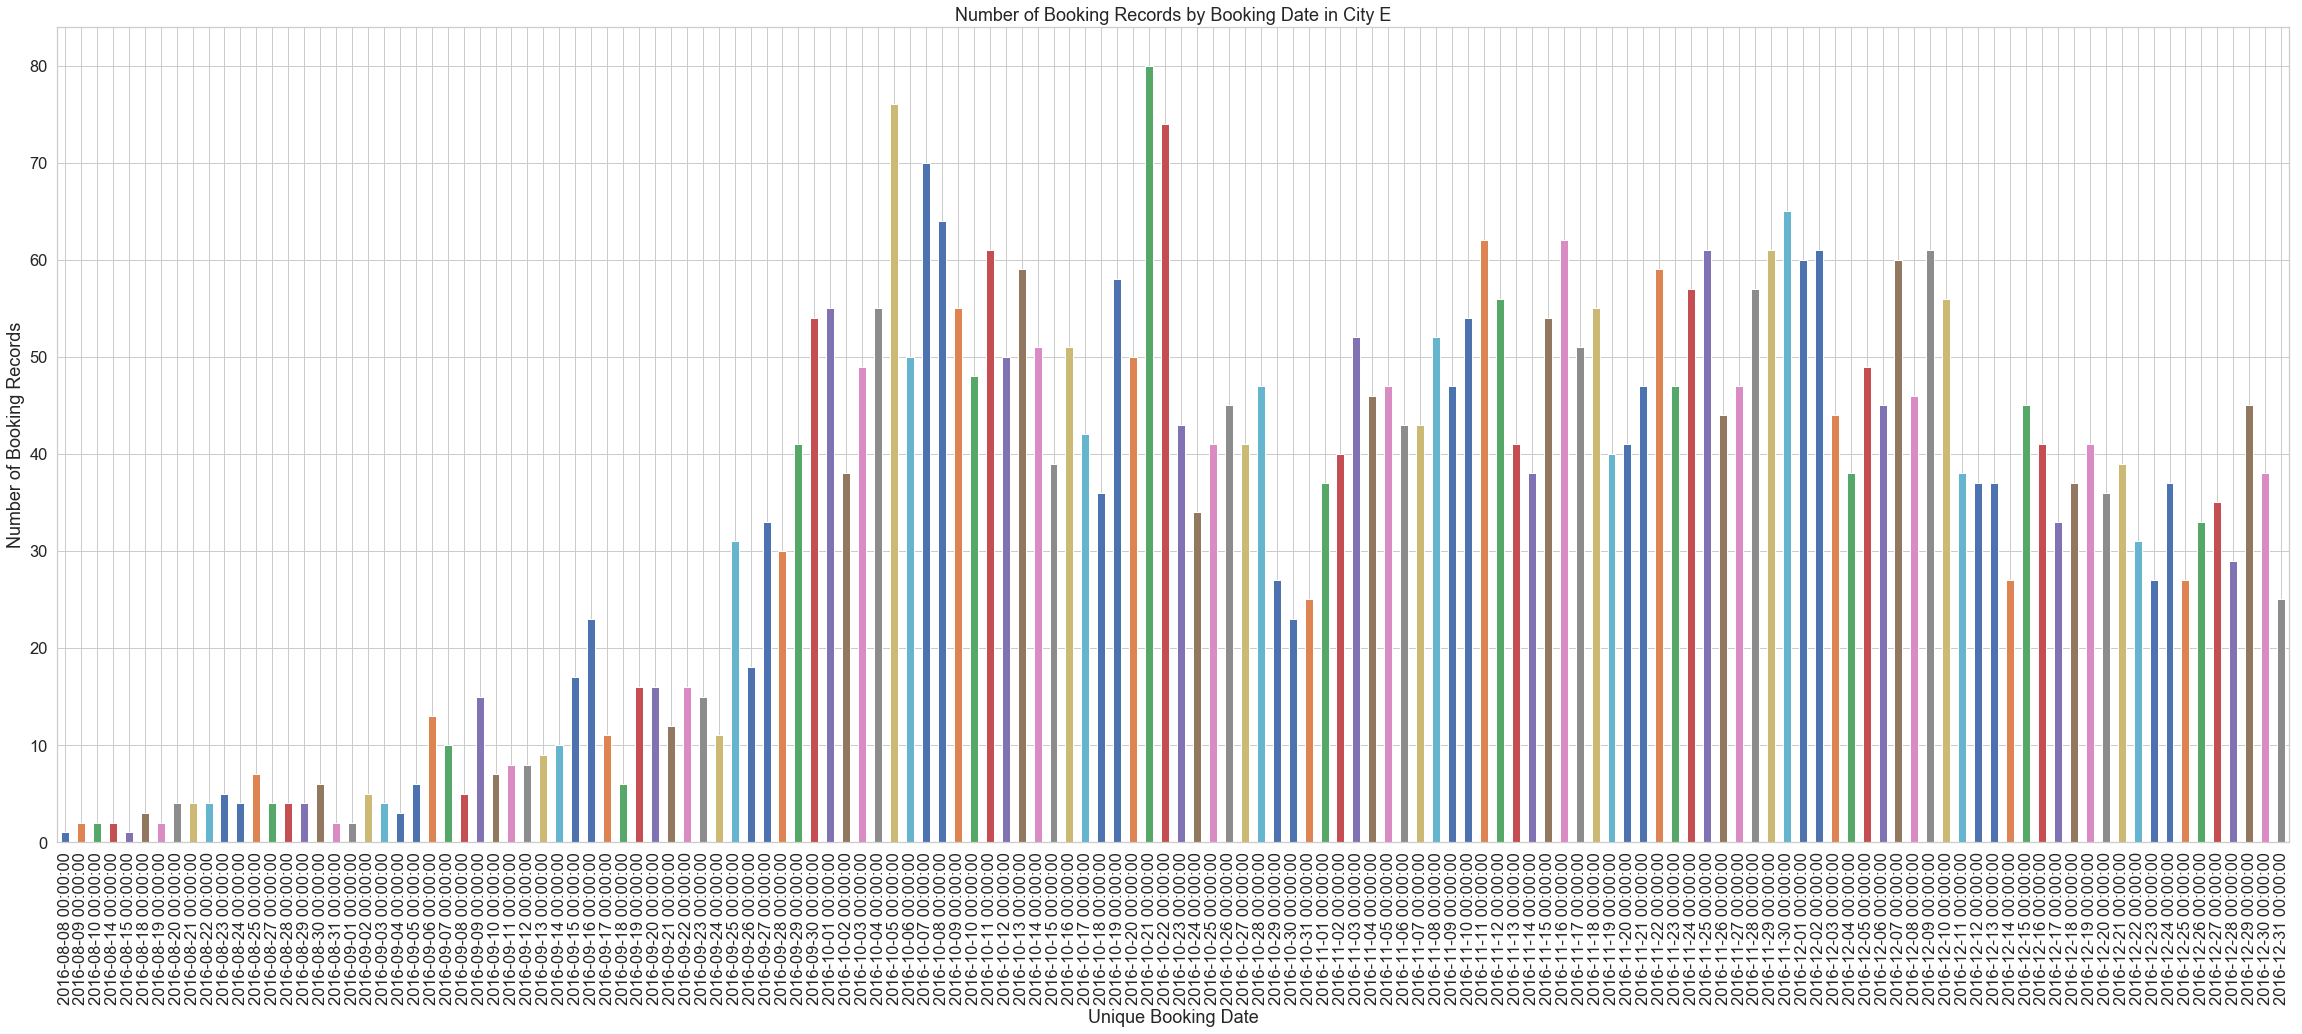

In [17]:
book_date_count_E = exE['booking_date'].groupby([exE['booking_date']]).agg('count')
book_date_count_E

num_book_bookdate_E = plt.figure(figsize=(40, 15))
book_date_count_E.plot(kind="bar")
plt.ylabel("Number of Booking Records")
plt.xlabel("Unique Booking Date")
plt.title("Number of Booking Records by Booking Date in City E");
num_book_bookdate_E.savefig('Pictures/num_book_bookdate_E.png')

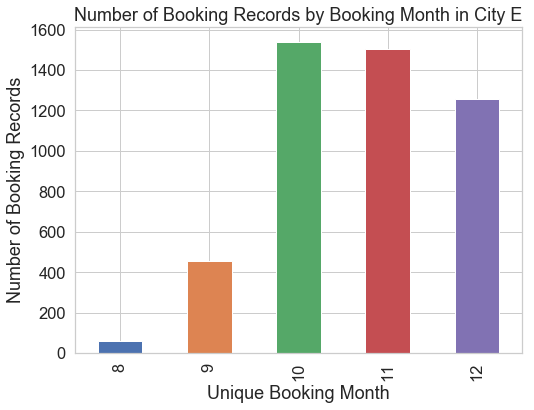

In [24]:
book_month_count_E = exE['booking_date'].groupby([exE['booking_date'].dt.month]).agg('count')
book_month_count_E

num_book_bookmonth_E = plt.figure(figsize=(8, 6))
book_month_count_E.plot(kind="bar")
plt.ylabel("Number of Booking Records")
plt.xlabel("Unique Booking Month")
plt.title("Number of Booking Records by Booking Month in City E");
num_book_bookmonth_E.savefig('Pictures/num_book_bookmonth_E.png')

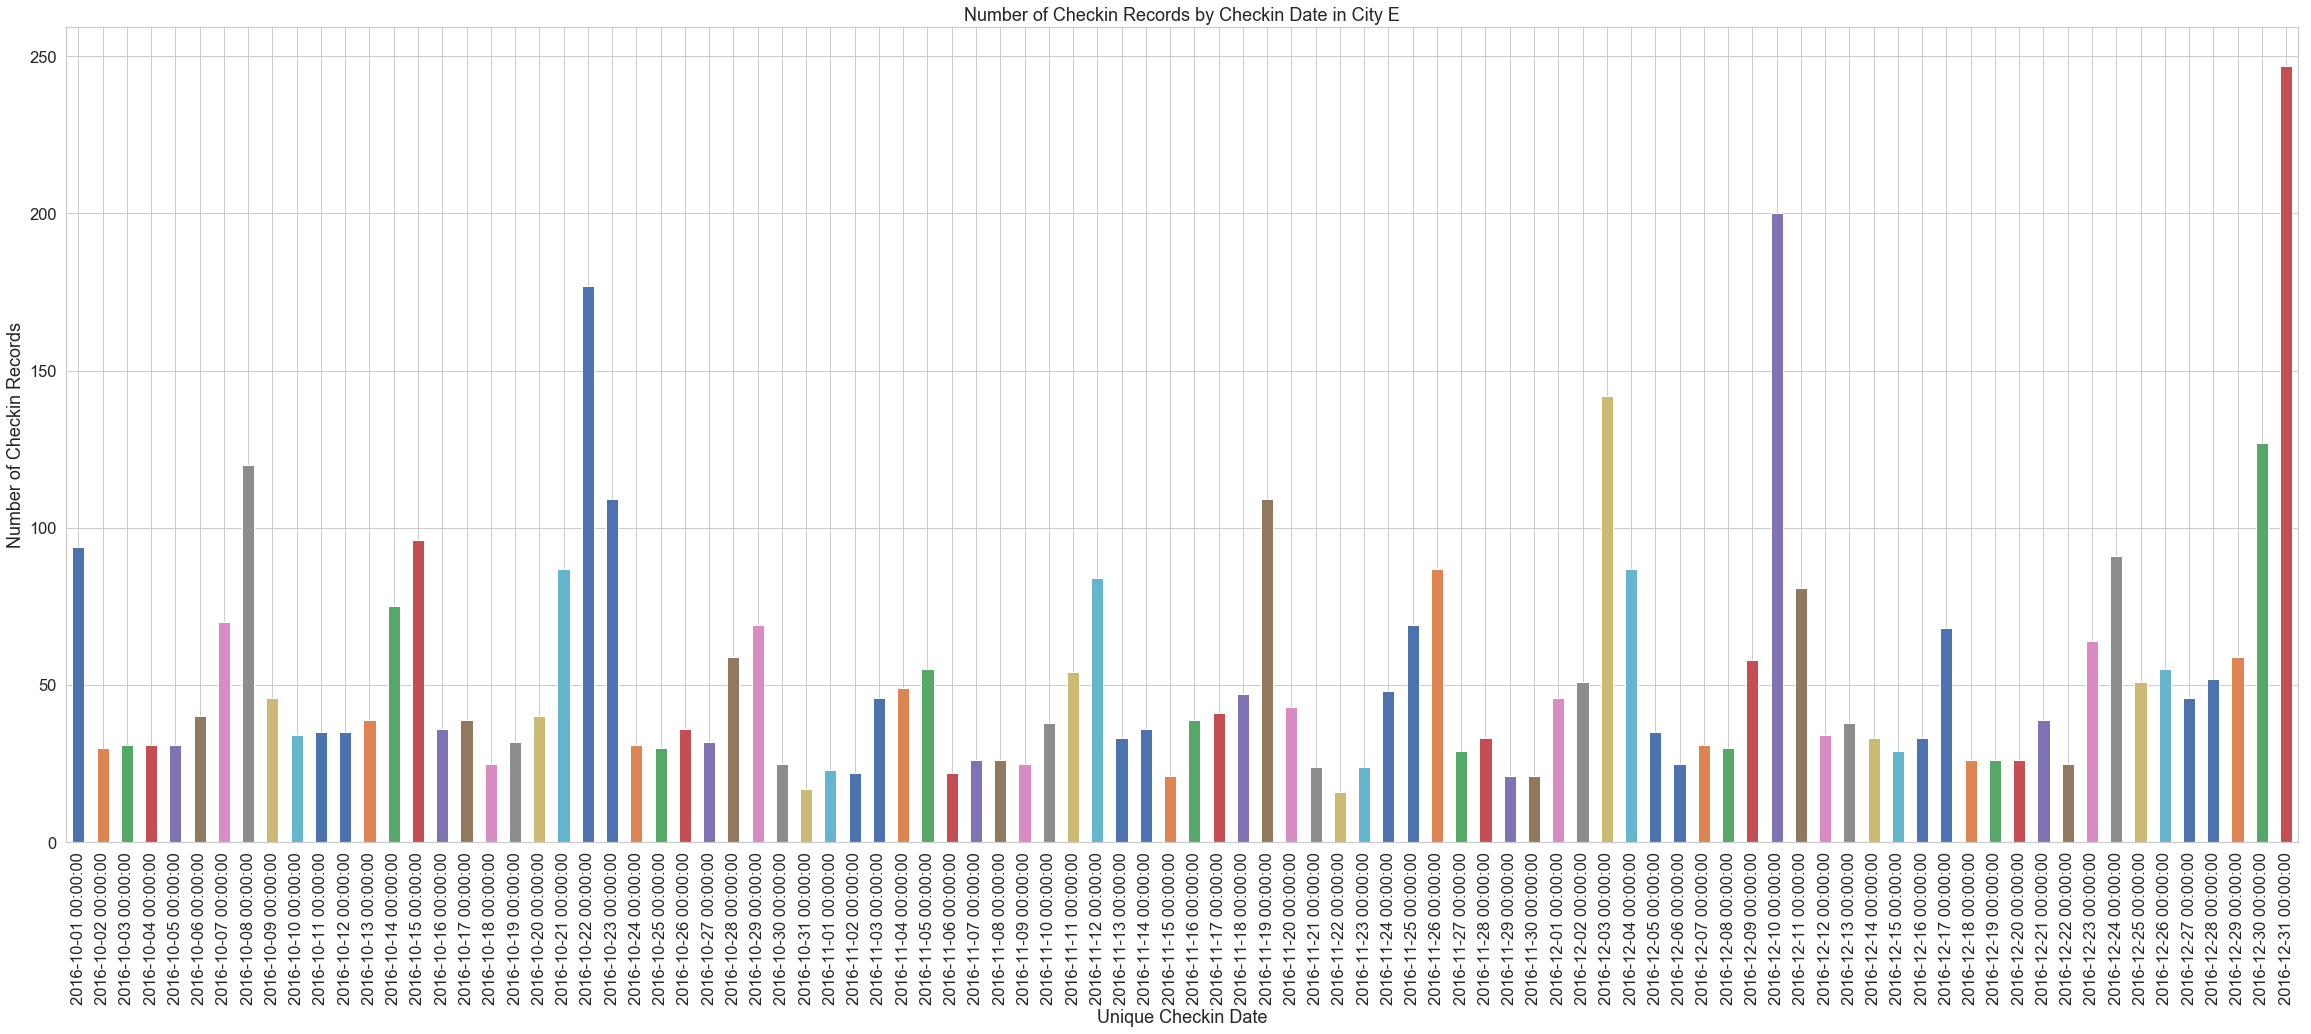

In [30]:
checkin_date_count_E = exE['checkin_date'].groupby([exE['checkin_date']]).agg('count')
checkin_date_count_E

num_book_checkdate_E = plt.figure(figsize=(40, 15))
checkin_date_count_E.plot(kind="bar")
plt.ylabel("Number of Checkin Records")
plt.xlabel("Unique Checkin Date")
plt.title("Number of Checkin Records by Checkin Date in City E");
num_book_checkdate_E.savefig('Pictures/num_book_checkdate_E.png')

#######################################################################################################

## City B

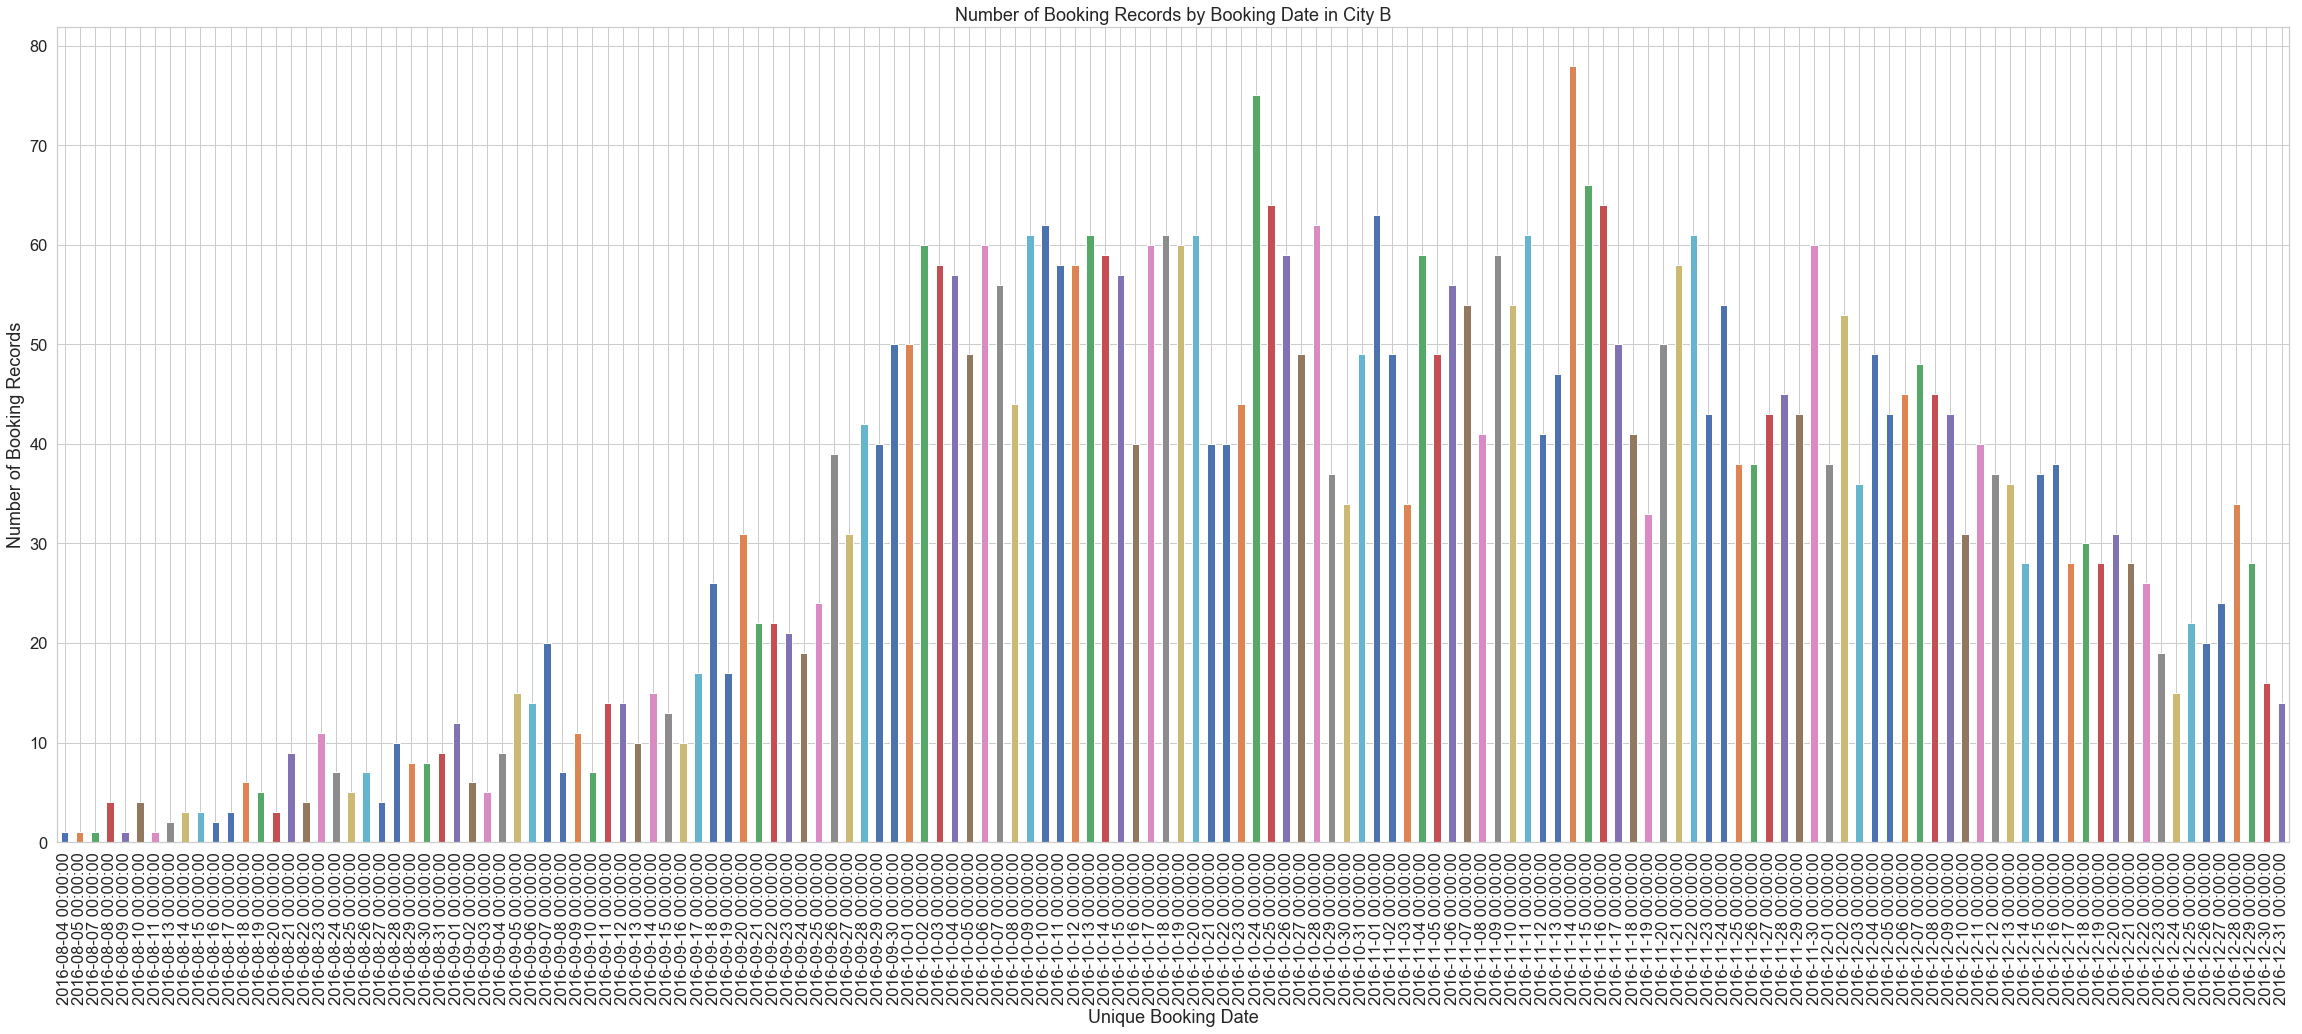

In [14]:
book_date_count_B = exB['booking_date'].groupby([exB['booking_date']]).agg('count')
book_date_count_B

num_book_bookdate_B = plt.figure(figsize=(40, 15))
book_date_count_B.plot(kind="bar")
plt.ylabel("Number of Booking Records")
plt.xlabel("Unique Booking Date")
plt.title("Number of Booking Records by Booking Date in City B");
num_book_bookdate_B.savefig('Pictures/num_book_bookdate_B.png')

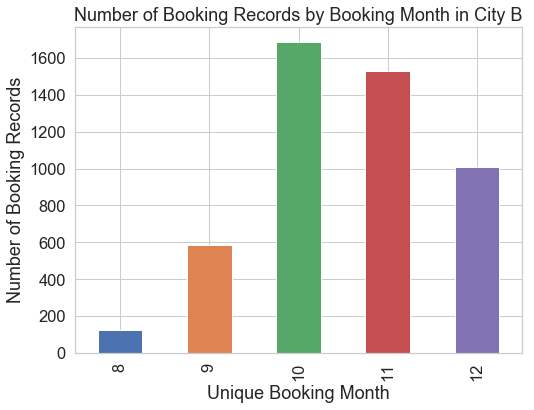

In [18]:
book_month_count_B = exB['booking_date'].groupby([exB['booking_date'].dt.month]).agg('count')
book_month_count_B

num_book_bookmonth_B = plt.figure(figsize=(8, 6))
book_month_count_B.plot(kind="bar")
plt.ylabel("Number of Booking Records")
plt.xlabel("Unique Booking Month")
plt.title("Number of Booking Records by Booking Month in City B");
num_book_bookmonth_B.savefig('Pictures/num_book_bookmonth_B.png')

In [8]:
exB['booking_date'].value_counts().head(3)

2016-11-14    78
2016-10-24    75
2016-11-15    66
Name: booking_date, dtype: int64

We can see that in City B, the top three dates that has the highest booking records is 11/14 (78 records), 10/24 (75 records), 11/15 (66 records).

In [9]:
exB['checkin_date'].value_counts().head(3)

2016-12-31    94
2016-12-30    87
2016-10-14    79
Name: checkin_date, dtype: int64

We can see that in City B, the top three dates that has the highest checkin records is 12/31 (94 records), 12/30 (87 records), 10/14 (79 records).

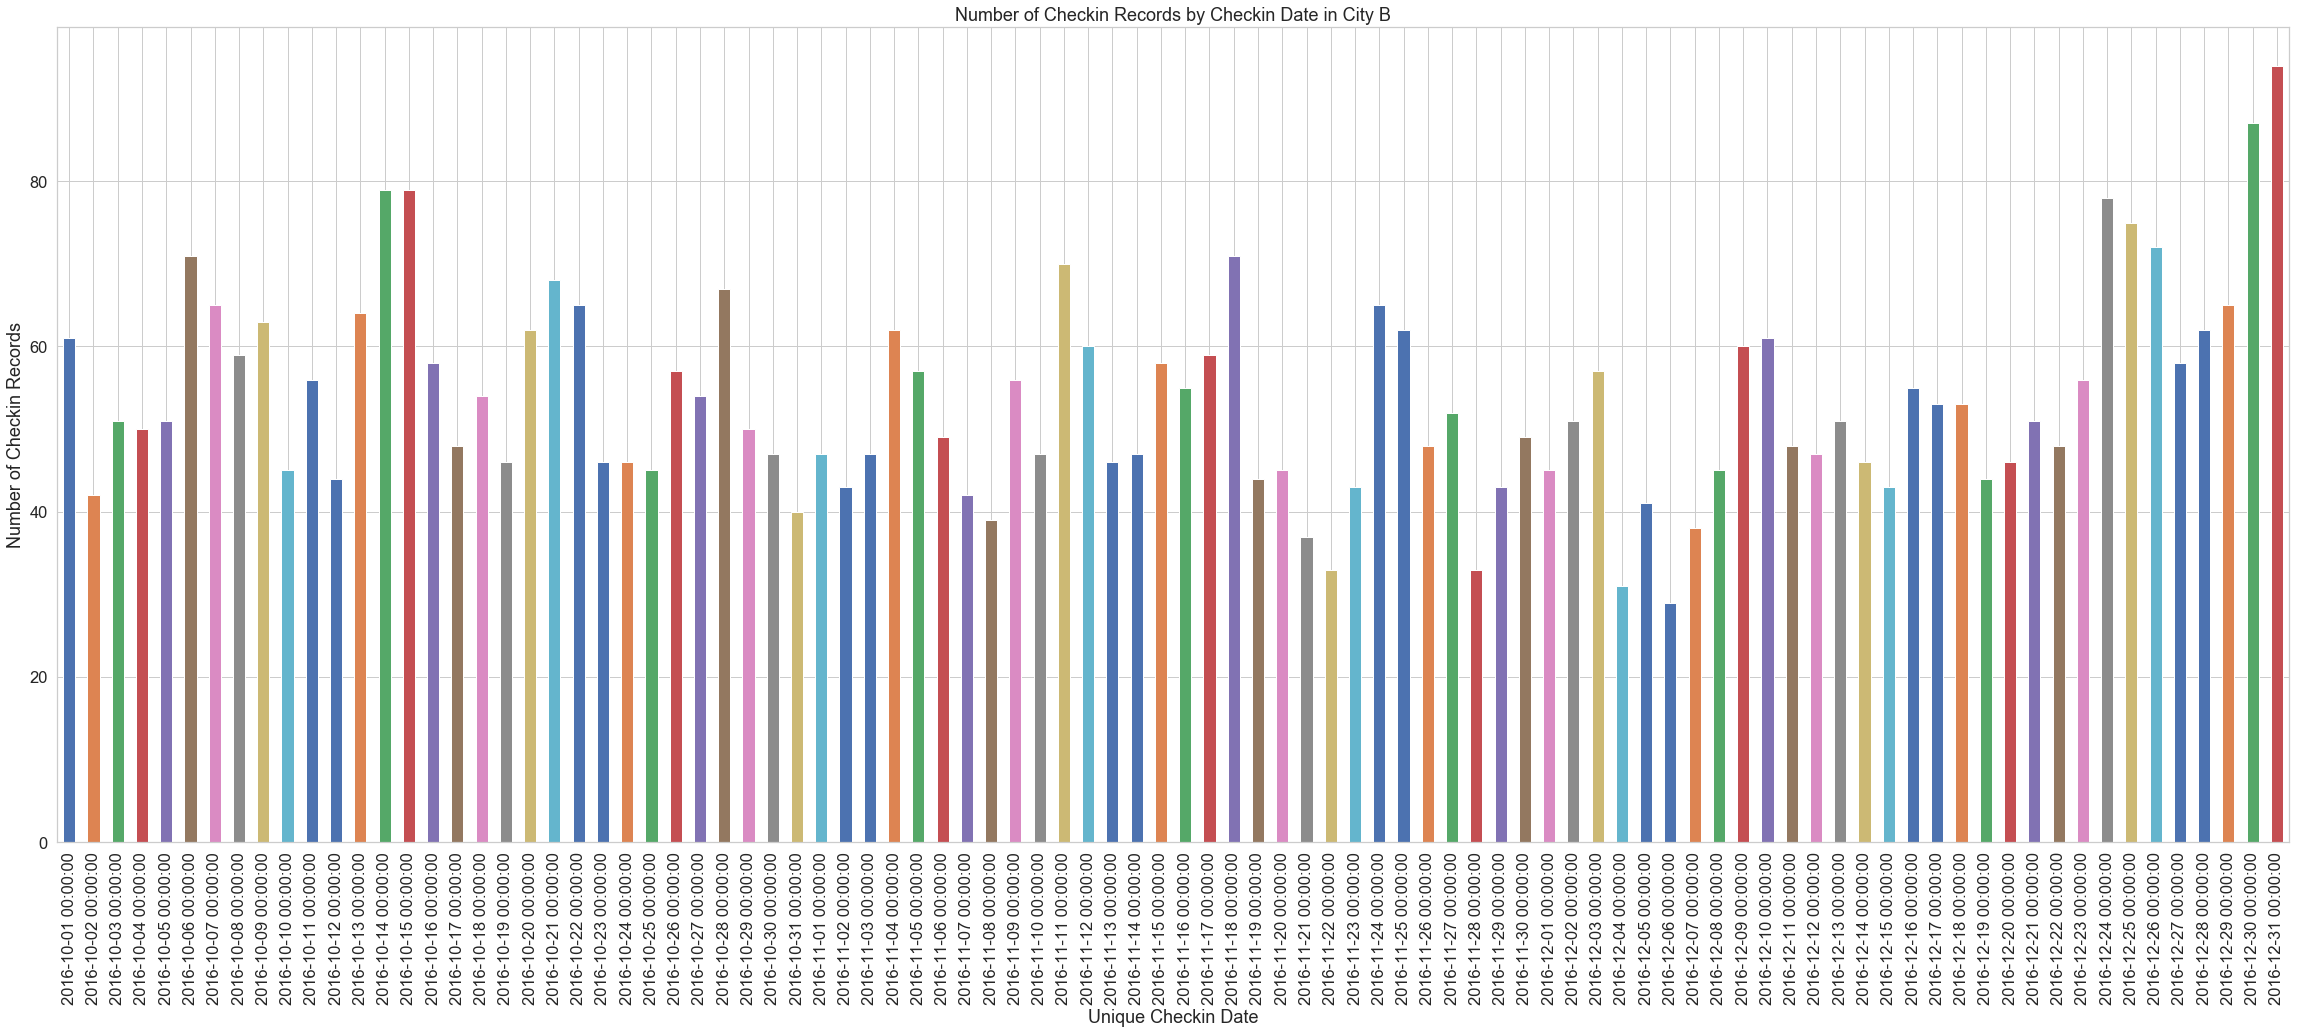

In [31]:
checkin_date_count_B = exB['checkin_date'].groupby([exB['checkin_date']]).agg('count')
checkin_date_count_B

num_book_checkdate_B = plt.figure(figsize=(40, 15))
checkin_date_count_B.plot(kind="bar")
plt.ylabel("Number of Checkin Records")
plt.xlabel("Unique Checkin Date")
plt.title("Number of Checkin Records by Checkin Date in City B");
num_book_checkdate_B.savefig('Pictures/num_book_checkdate_B.png')

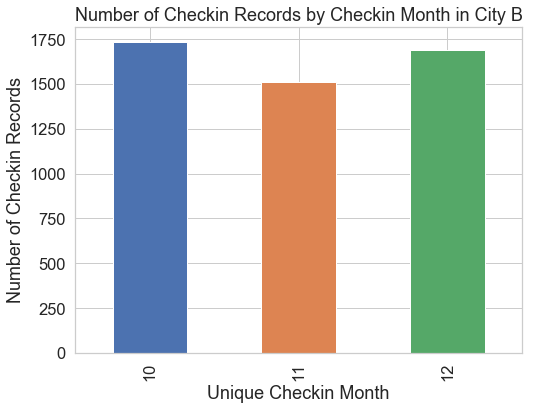

In [11]:
checkin_month_count_B = exB['checkin_date'].groupby([exB['checkin_date'].dt.month]).agg('count')
checkin_month_count_B

plt.figure(figsize=(8, 6))
checkin_month_count_B.plot(kind="bar")
plt.ylabel("Number of Checkin Records")
plt.xlabel("Unique Checkin Month")
plt.title("Number of Checkin Records by Checkin Month in City B");

The number of Checkin records in each month also seems to be spread out equally compare to the number of Booking records in each month.

The number of checkin record's distribution looks more spread out equally compare to the number of booking record's distribution. However, there seems to be some kind of seasonal factors in the distribution (by Dates). Let's take a look at the checkin record's distribution in a different city. City A in this case, since it has the most record. Which might indicate that it is a bigger city, therefore, lead to a more general result.

## City A

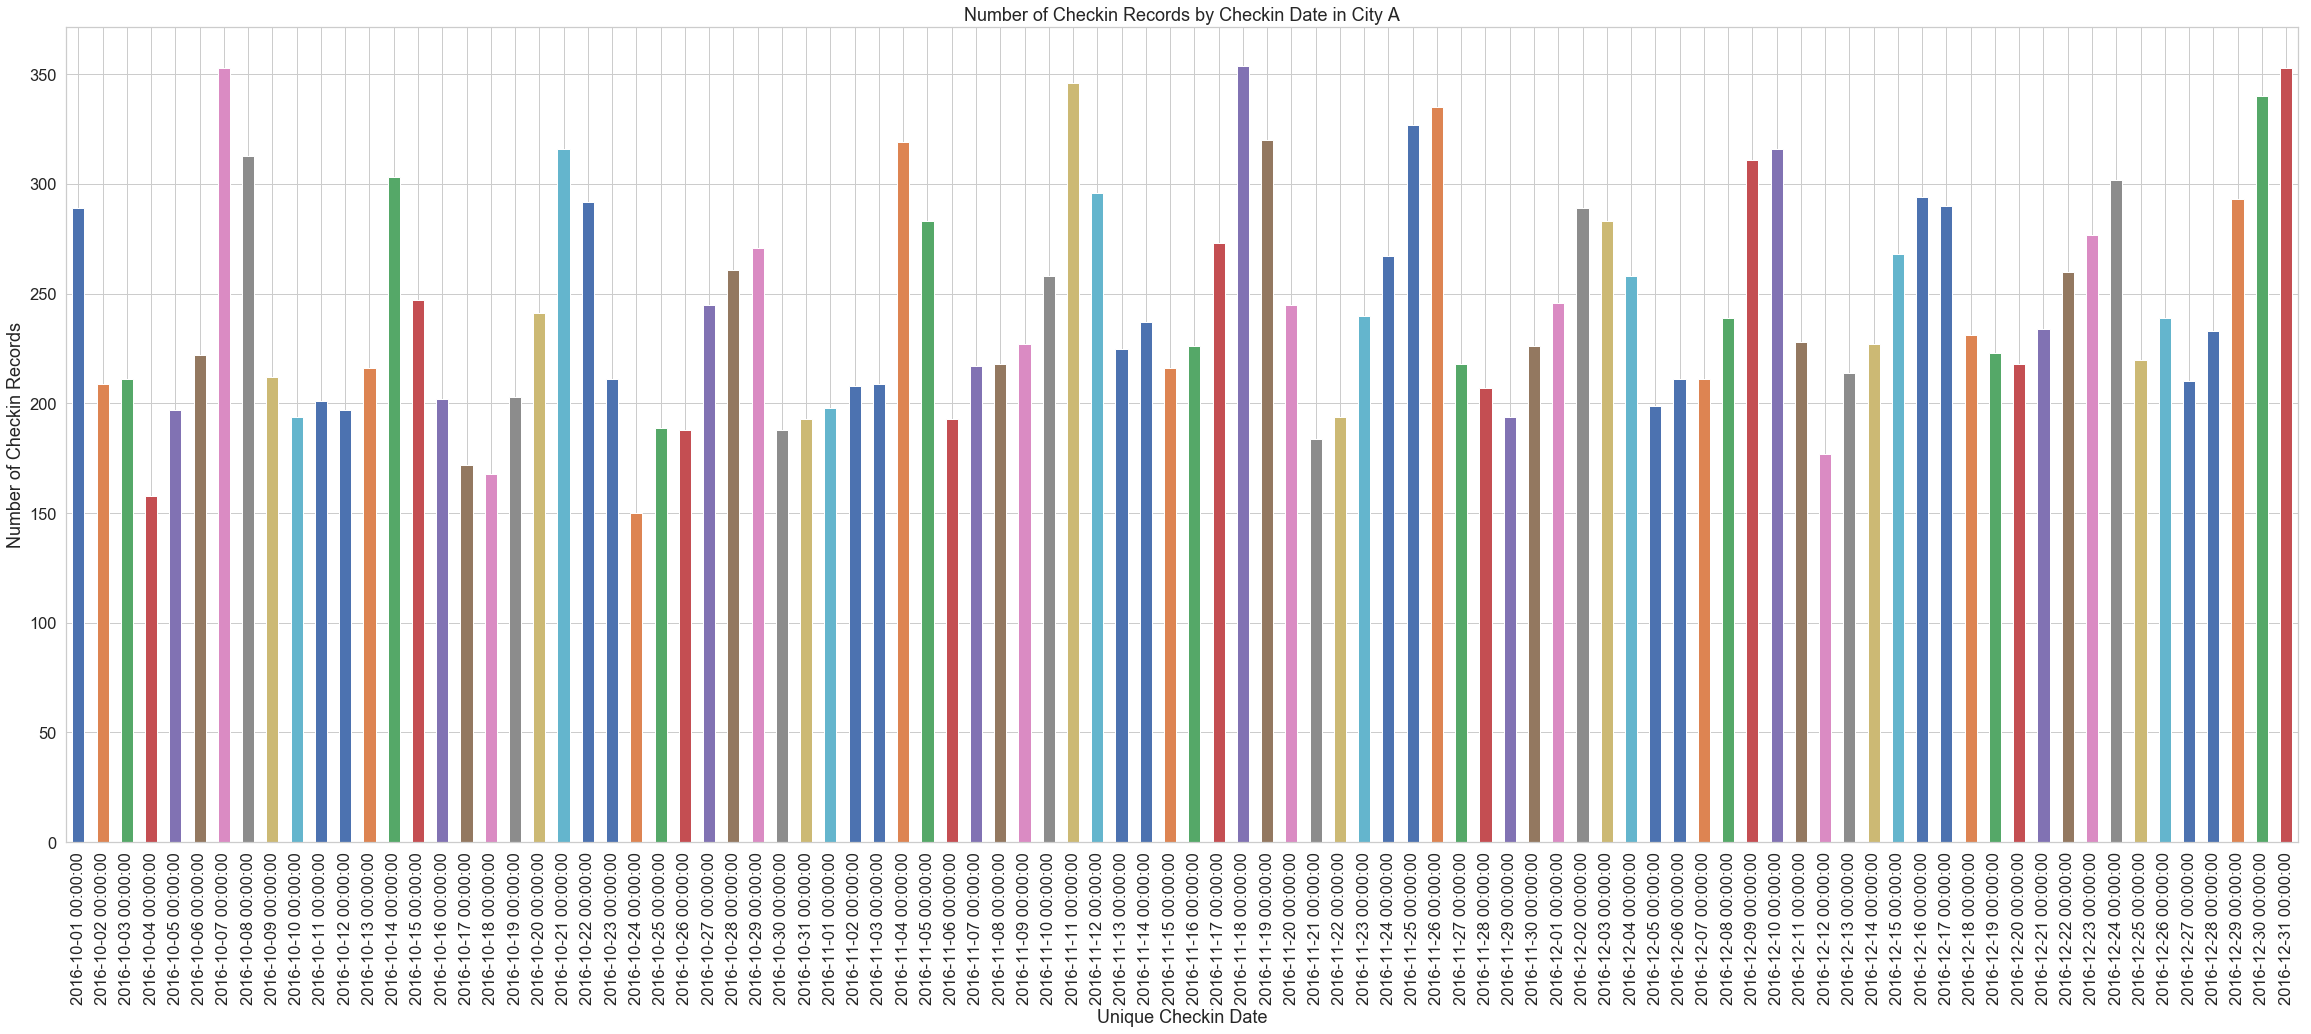

In [32]:
checkin_date_count_A = exA['checkin_date'].groupby([exA['checkin_date']]).agg('count')
checkin_date_count_A

num_book_checkdate_A = plt.figure(figsize=(40, 15))
checkin_date_count_A.plot(kind="bar")
plt.ylabel("Number of Checkin Records")
plt.xlabel("Unique Checkin Date")
plt.title("Number of Checkin Records by Checkin Date in City A");
num_book_checkdate_A.savefig('Pictures/num_book_checkdate_A.png')

It is very clear now, that there indeed is a seasonal factor. We can see that there is always two higher number of records in every 7 days. <br>
For example: <br>
10/07 and 10/08 <br>
10/14 and 10/15 <br>
10/21 and 10/22 <br>
...<br>
<br>
This might indicate that these days are weekends (Fridar/Saturday/Sunday), therefore, having more checkin records. <br>
By checking the calendar at the exact time in 2016. These days turns out to be the Fridays and the Saturdays. <br>

In addition to implementing the urgency message before the holiday season starts, we can also focus on the booking increase for the weekend checkin days. Let's call this **the weekend market** as a shorthand.

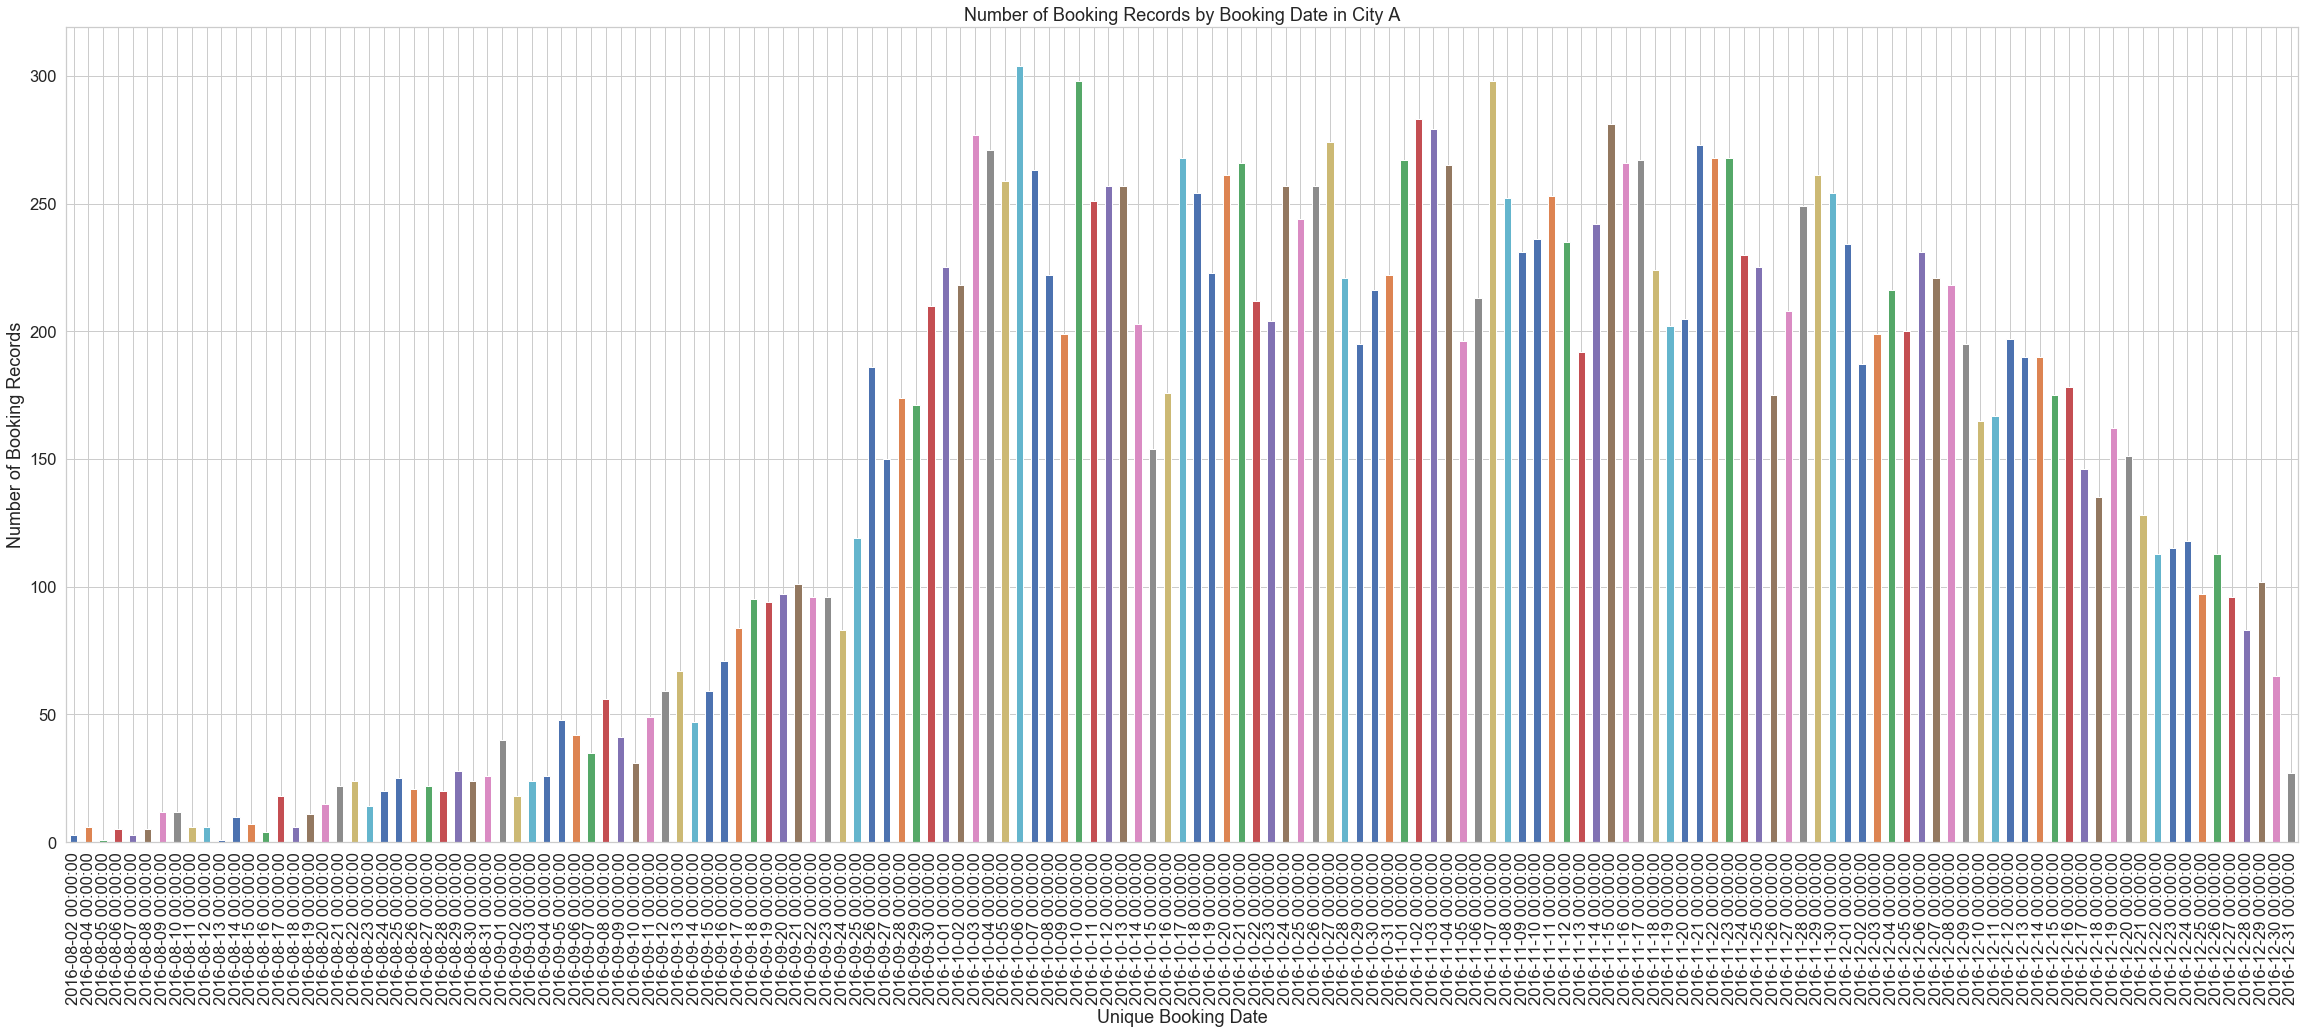

In [13]:
book_date_count_A = exA['booking_date'].groupby([exA['booking_date']]).agg('count')
book_date_count_A

num_book_bookdate_A = plt.figure(figsize=(40, 15))
book_date_count_A.plot(kind="bar")
plt.ylabel("Number of Booking Records")
plt.xlabel("Unique Booking Date")
plt.title("Number of Booking Records by Booking Date in City A");
num_book_bookdate_A.savefig('Pictures/num_book_bookdate_A.png')

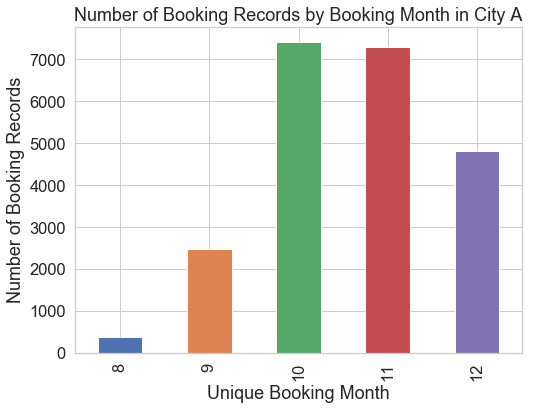

In [19]:
book_month_count_A = exA['booking_date'].groupby([exA['booking_date'].dt.month]).agg('count')
book_month_count_A

num_book_bookmonth_A = plt.figure(figsize=(8, 6))
book_month_count_A.plot(kind="bar")
plt.ylabel("Number of Booking Records")
plt.xlabel("Unique Booking Month")
plt.title("Number of Booking Records by Booking Month in City A");
num_book_bookmonth_A.savefig('Pictures/num_book_bookmonth_A.png')

Take a closer look at the time starting from October. Let's zoom in a little bit.

In [14]:
exA['booking_month'] = exA['booking_date'].dt.month
exA.tail(5)
# getting the records that is after September (starting with October)
exA_101112 = exA[exA['booking_month'] > 9]
exA_101112.head(5)

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,booking_month
2846,2847,104.14,21272,9395,4.0,Hotel,non-chain,2016-10-01,2016-10-01,2016-10-02,10
2847,2848,80.96,782884,9395,3.0,Hotel,chain,2016-10-01,2016-10-29,2016-10-31,10
2848,2849,80.96,782884,9395,3.0,Hotel,chain,2016-10-01,2016-10-29,2016-10-31,10
2849,2850,182.76,96982,9395,4.0,Hotel,chain,2016-10-01,2016-10-27,2016-10-30,10
2850,2851,62.97,866630,9395,3.5,Serviced Apartment,non-chain,2016-10-01,2016-10-08,2016-10-10,10


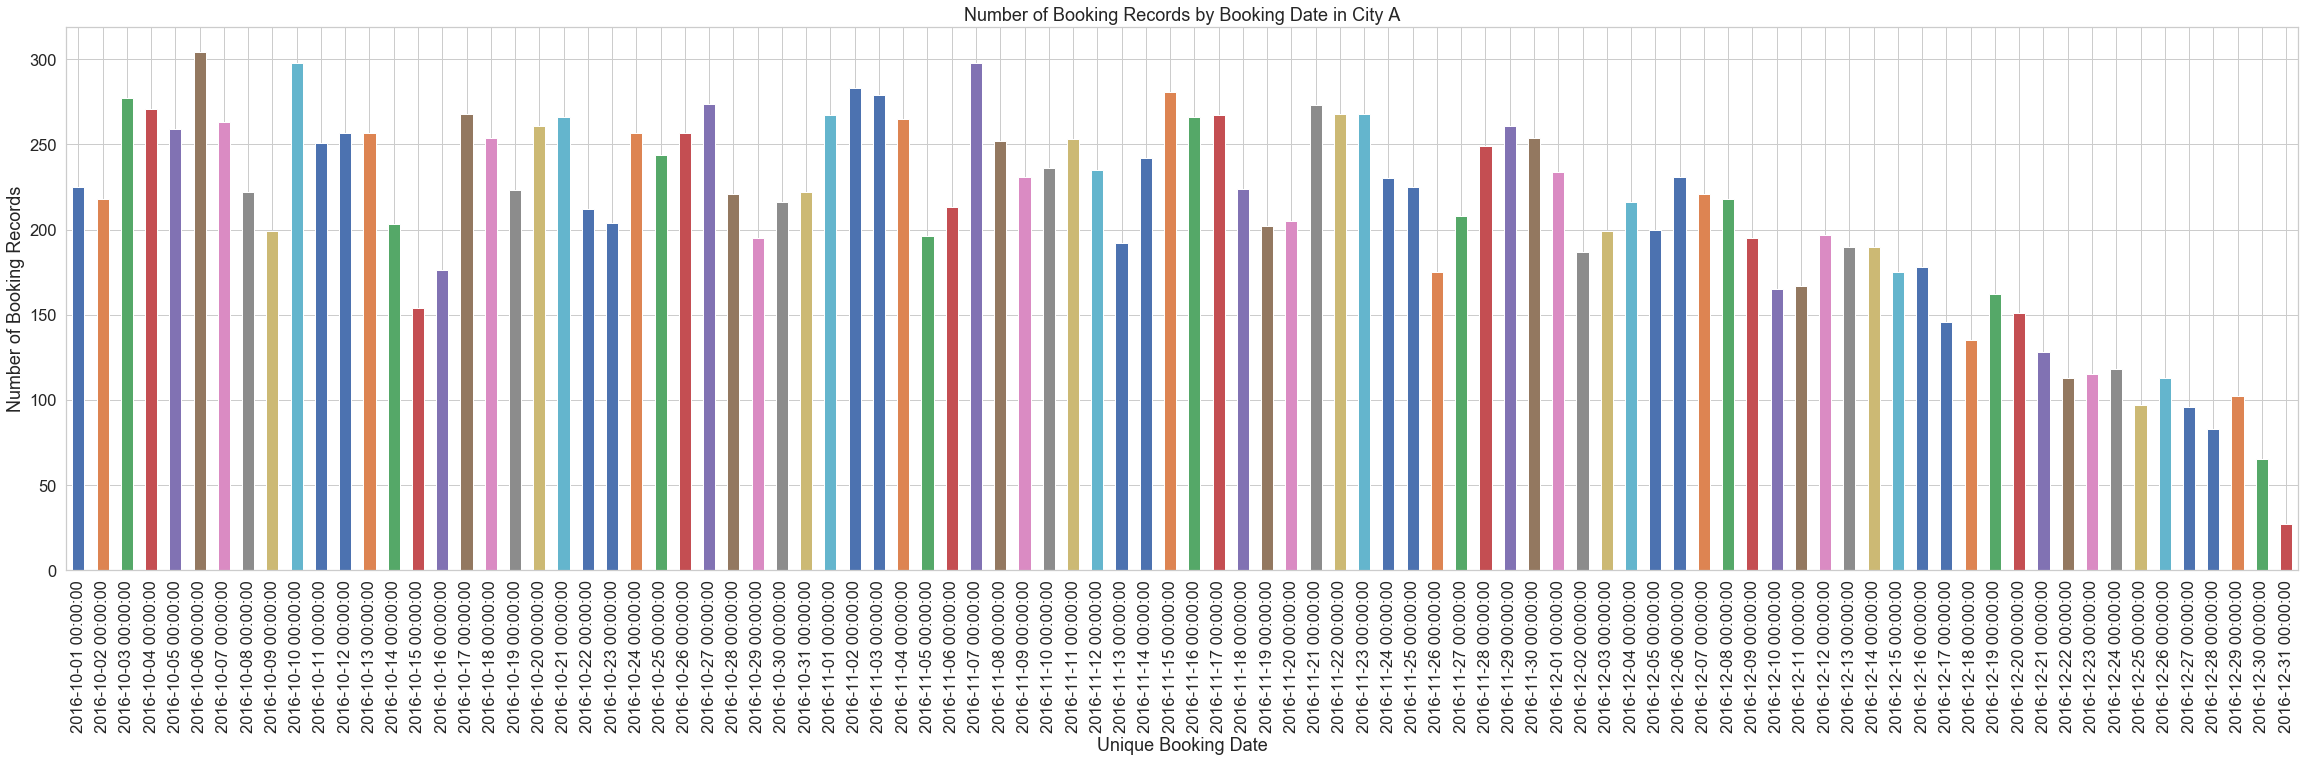

In [15]:
book_date_count_A_10 = exA_101112['booking_date'].groupby([exA_101112['booking_date']]).agg('count')
book_date_count_A_10

plt.figure(figsize=(40, 10))
book_date_count_A_10.plot(kind="bar")
plt.ylabel("Number of Booking Records")
plt.xlabel("Unique Booking Date")
plt.title("Number of Booking Records by Booking Date in City A");

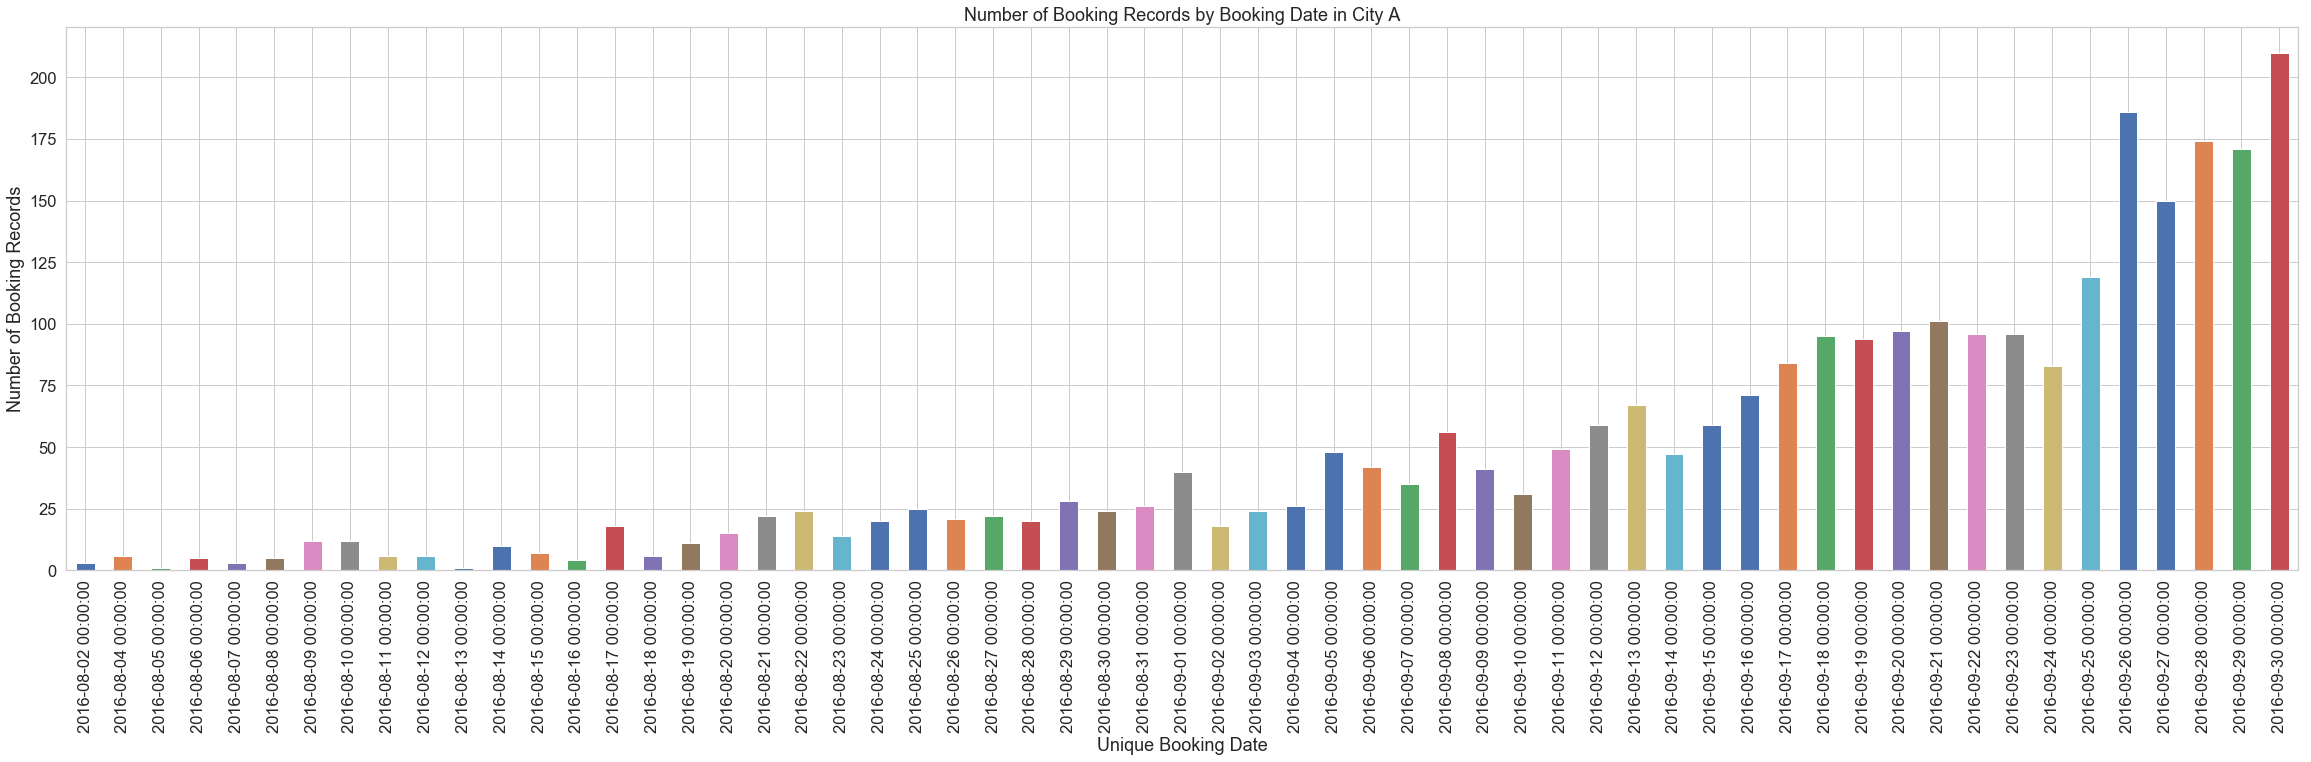

In [16]:
exA_89 = exA[exA['booking_month'] < 10]
exA_89.tail(5)

book_date_count_A_89 = exA_89['booking_date'].groupby([exA_89['booking_date']]).agg('count')
book_date_count_A_89

plt.figure(figsize=(40, 10))
book_date_count_A_89.plot(kind="bar")
plt.ylabel("Number of Booking Records")
plt.xlabel("Unique Booking Date")
plt.title("Number of Booking Records by Booking Date in City A");

In [17]:
exA['accommadation_type_name'].value_counts()

Hotel                            18398
Serviced Apartment                2326
Hostel                            1002
Guest House / Bed & Breakfast      520
Apartment                           51
Resort                              33
Motel                               27
Ryokan                               9
Name: accommadation_type_name, dtype: int64

In City A out of the 22366 total records, 18398 records belongs to "Hotel" type (which is about 82.25%), whereas the 2nd high record, "Serviced Apartment", has 2326 records that only represents 10% of the total. <br> 
Therefore, we can say that in City A "Hotel" type has the biggest market among other accommadation types. <br>

On the other hand, in City B, out of the 4932 total records, 1930 records belongs to "Resort" (39.1%), and the 2nd high record is "Hotel", for having 1890 records (38.3%), and the 3rd high record is "Guest House", for having 532 records (10.8%)

In [18]:
exB['accommadation_type_name'].value_counts()

Resort                           1930
Hotel                            1890
Guest House / Bed & Breakfast     532
Resort Villa                      299
Bungalow                          141
Serviced Apartment                 70
Apartment                          34
Hostel                             17
Private Villa                      15
Holiday Park / Caravan Park         3
Villa                               1
Name: accommadation_type_name, dtype: int64

In [19]:
exC['accommodation_type_name'].value_counts()

Hotel                            4830
Capsule Hotel                     822
Hostel                            408
Guest House / Bed & Breakfast     374
Apartment                         137
Resort                            126
Ryokan                             94
Love Hotel                          3
Serviced Apartment                  2
Home                                1
Name: accommodation_type_name, dtype: int64

In [21]:
exD['accommodation_type_name'].value_counts()

Hotel                            7783
Hostel                           1269
Guest House / Bed & Breakfast     991
Serviced Apartment                 97
Home                               12
Name: accommodation_type_name, dtype: int64

In [22]:
exE['accommodation_type_name'].value_counts()

Hotel                            2540
Resort                           1436
Guest House / Bed & Breakfast     341
Serviced Apartment                302
Resort Villa                       98
Hostel                             78
Apartment                          17
Private Villa                       3
Home                                1
Bungalow                            1
Name: accommodation_type_name, dtype: int64

One thing to notice: In City A and City B the column is misspelt ad "accommadation_type_name", whereas in City C, City D, City E it is spell as "accommodation_type_name"

The Top 1 accommodation type that has the most records in each city:<br>
<br>
City A: Hotel (82.25%)<br>
City B: Resort (39.1%)<br>
City C: Hotel (71%)<br>
City D: Hotel (76.66%)<br>
City E: Hotel (52.73%)<br>

In [23]:
exB['chain_hotel'].value_counts()

non-chain    3882
chain        1050
Name: chain_hotel, dtype: int64

Let's use the result of the Top Accommodation type and combine it with the booking record plot to see if there is some kind of relationship between the price and the amount of booking records.

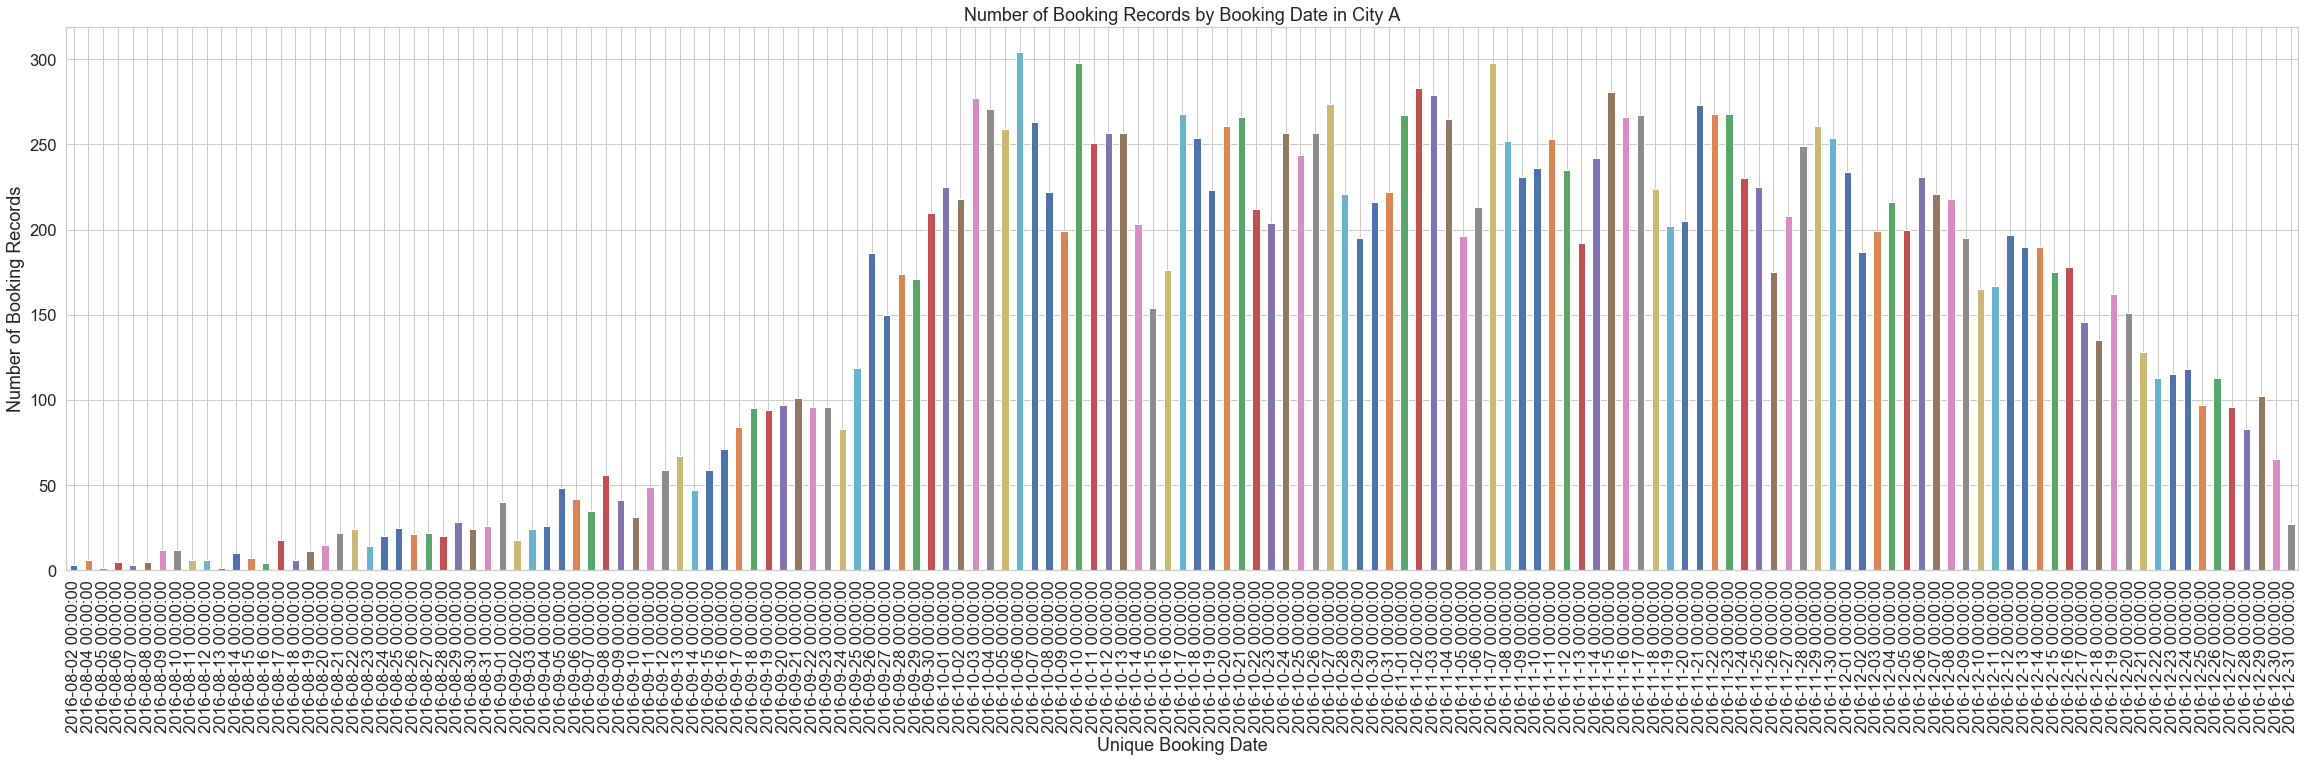

In [24]:
book_date_count_A = exA['booking_date'].groupby([exA['booking_date']]).agg('count')
book_date_count_A

plt.figure(figsize=(40, 10))
book_date_count_A.plot(kind="bar")
plt.ylabel("Number of Booking Records")
plt.xlabel("Unique Booking Date")
plt.title("Number of Booking Records by Booking Date in City A");

In [25]:
exA.head()

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,booking_month
0,1,71.06,297388,9395,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,8
1,2,76.56,298322,9395,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,8
2,3,153.88,2313076,9395,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,8
3,4,126.60,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,8
4,5,115.08,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,8


######################################################################################################

In [45]:
exA['checkin_date'].value_counts().head()
exB['checkin_date'].value_counts().head()
exC['checkin_date'].value_counts().head()
exD['checkin_date'].value_counts().head()
exE['checkin_date'].value_counts().head()

2016-12-31    247
2016-12-10    200
2016-10-22    177
2016-12-03    142
2016-12-30    127
Name: checkin_date, dtype: int64

######################################################################################################

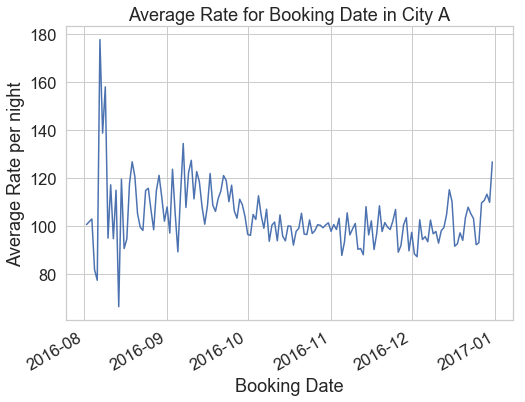

In [65]:
book_date_price_A = exA['ADR_USD'].groupby([exA['booking_date']]).agg('mean')
book_date_price_A

ADR_bookdate_A = plt.figure(figsize=(8, 6))
book_date_price_A.plot(kind="line")
plt.xlabel("Booking Date")
plt.ylabel("Average Rate per night");
plt.title("Average Rate for Booking Date in City A")
ADR_bookdate_A.savefig('Pictures/ADR_bookdate_A.png')

Doesn't make sense to me. Because in our assumption, we should have higher rates when it's close to the holiday seasons. Maybe let's look at the seperate price for different accommodation type.

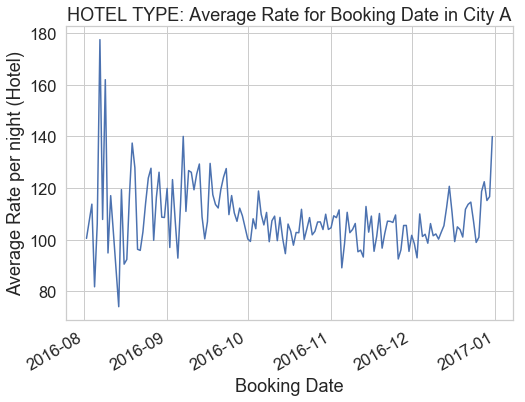

In [66]:
book_date_price_acco_A = exA['ADR_USD'].groupby([exA['accommadation_type_name'], exA['booking_date']]).agg('mean')
book_date_price_acco_A['Hotel']

ADR_bookdate_A_hotel = plt.figure(figsize=(8, 6))
book_date_price_acco_A['Hotel'].plot(kind="line")
plt.xlabel("Booking Date")
plt.ylabel("Average Rate per night (Hotel)");
plt.title("HOTEL TYPE: Average Rate for Booking Date in City A")
ADR_bookdate_A_hotel.savefig('Pictures/ADR_bookdate_A_hotel.png')

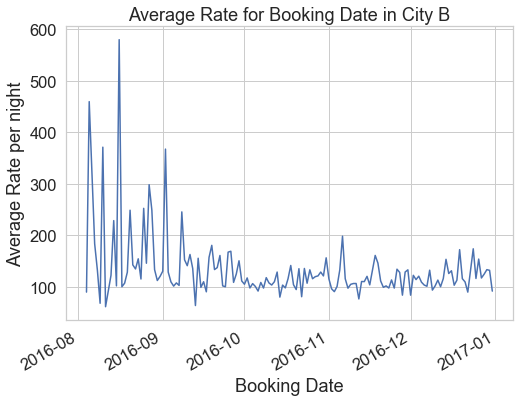

In [67]:
book_date_price_B = exB['ADR_USD'].groupby([exB['booking_date']]).agg('mean')
book_date_price_B

ADR_bookdate_B = plt.figure(figsize=(8, 6))
book_date_price_B.plot(kind="line")
plt.xlabel("Booking Date")
plt.ylabel("Average Rate per night");
plt.title("Average Rate for Booking Date in City B")
ADR_bookdate_B.savefig('Pictures/ADR_bookdate_B.png')

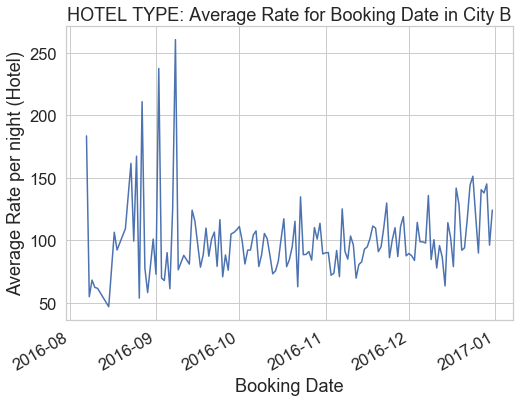

In [69]:
book_date_price_acco_B = exB['ADR_USD'].groupby([exB['accommadation_type_name'], exB['booking_date']]).agg('mean')
book_date_price_acco_B['Hotel']

ADR_bookdate_B_hotel = plt.figure(figsize=(8, 6))
book_date_price_acco_B['Hotel'].plot(kind="line")
plt.xlabel("Booking Date")
plt.ylabel("Average Rate per night (Hotel)");
plt.title("HOTEL TYPE: Average Rate for Booking Date in City B")
ADR_bookdate_B_hotel.savefig('Pictures/ADR_bookdate_B_hotel.png')

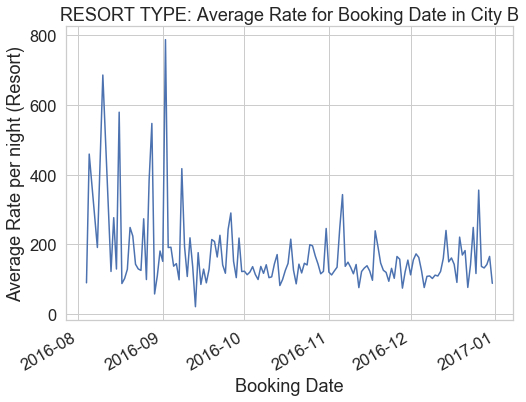

In [71]:
book_date_price_acco_B = exB['ADR_USD'].groupby([exB['accommadation_type_name'], exB['booking_date']]).agg('mean')
book_date_price_acco_B['Resort']

ADR_bookdate_B_resort = plt.figure(figsize=(8, 6))
book_date_price_acco_B['Resort'].plot(kind="line")
plt.xlabel("Booking Date")
plt.ylabel("Average Rate per night (Resort)");
plt.title("RESORT TYPE: Average Rate for Booking Date in City B")
ADR_bookdate_B_resort.savefig('Pictures/ADR_bookdate_B_resort.png')

Seems like the price goes down after September in both City A and City B. <br>
<br>
**Looking at the Booking Records plot for both City A and City B, we can see that the booking amount increased a lot starting around the end of September. This might be because of many discounts are provided from each hotel accommodation, that leads to a lower ADR (Average Daily Rate) which we see in the above Average Rate for Booking Date plot.** <br>
<br>
Let's assume that for now. And then, let's take a look at the difference in dates between the booking date and checkin date. 

Text(0.5, 1.0, 'Average Rate for Checkin Date in City B')

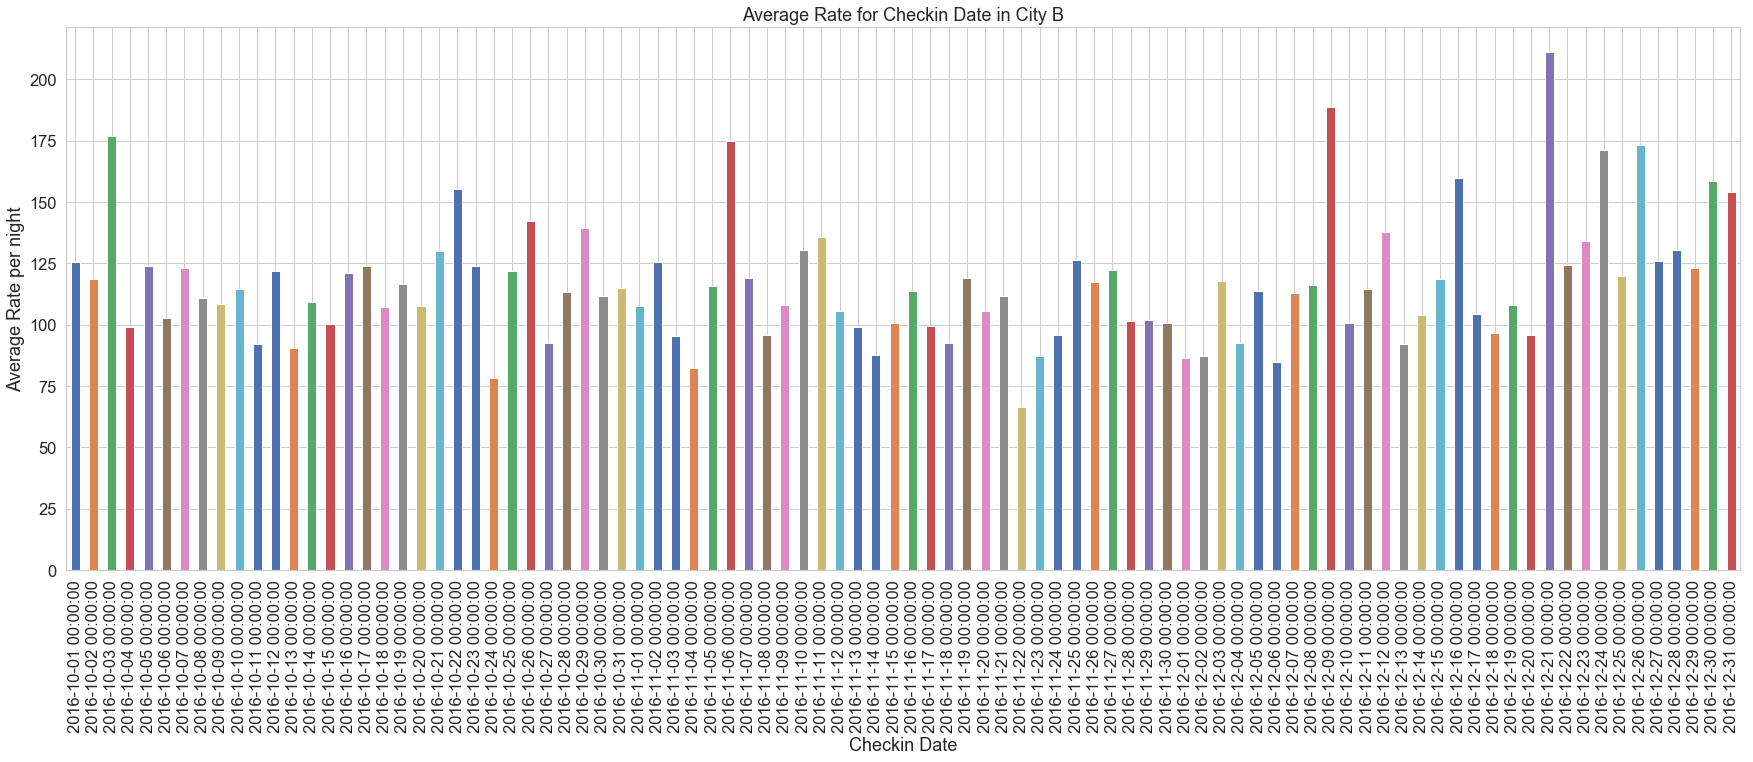

In [31]:
checkin_date_price_B = exB['ADR_USD'].groupby([exB['checkin_date']]).agg('mean')
checkin_date_price_B

plt.figure(figsize=(30, 10))
checkin_date_price_B.plot(kind="bar")
plt.xlabel("Checkin Date")
plt.ylabel("Average Rate per night");
plt.title("Average Rate for Checkin Date in City B")

Text(0.5, 1.0, 'Average Rate for Checkin Date in City A')

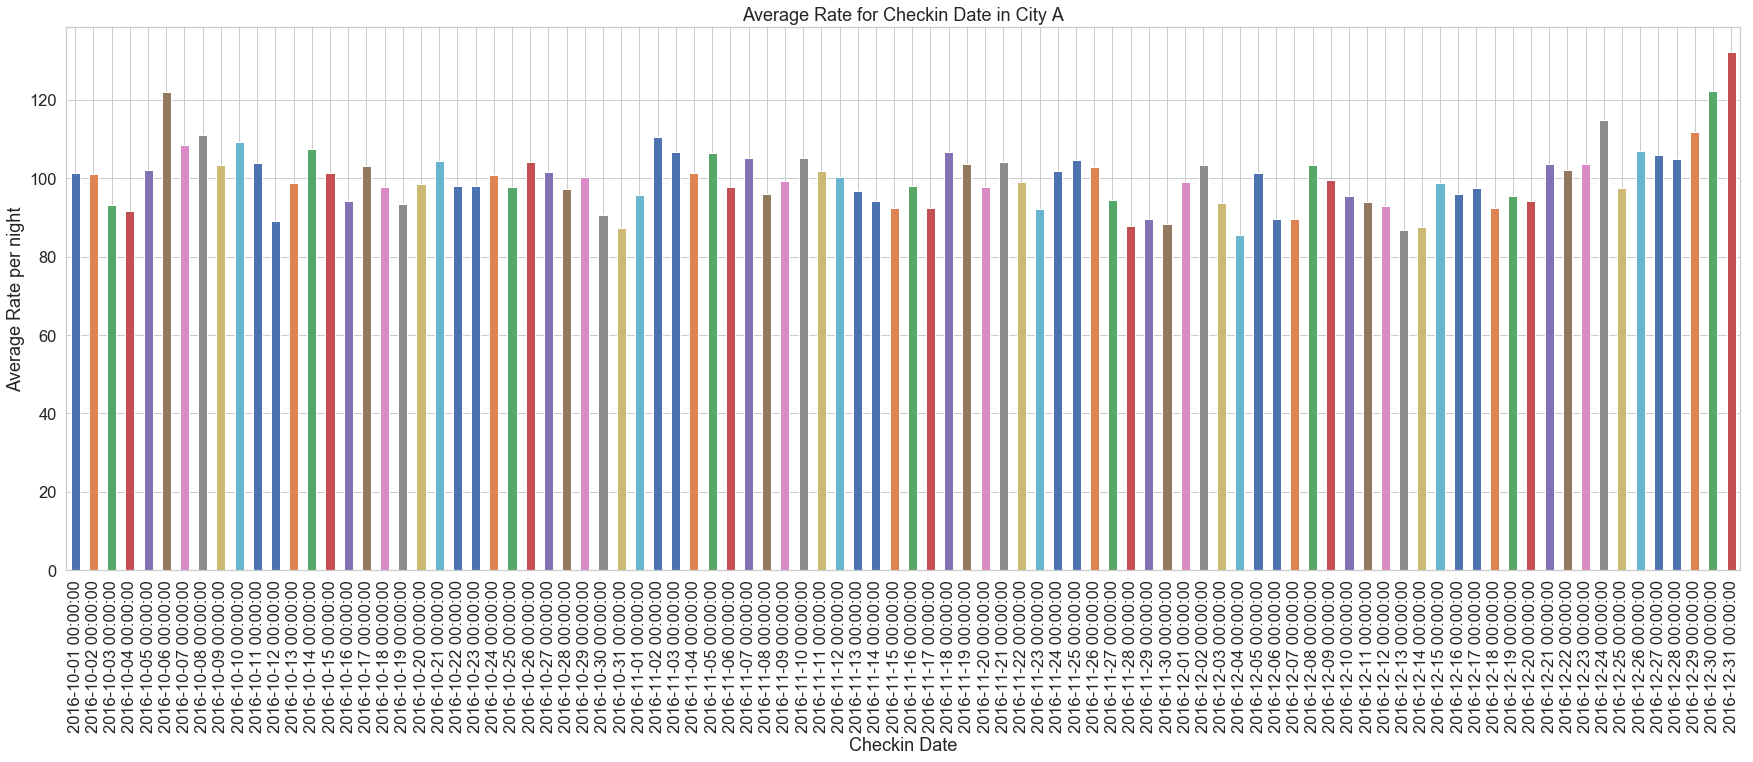

In [32]:
checkin_date_price_A = exA['ADR_USD'].groupby([exA['checkin_date']]).agg('mean')
checkin_date_price_A

plt.figure(figsize=(30, 10))
checkin_date_price_A.plot(kind="bar")
plt.xlabel("Checkin Date")
plt.ylabel("Average Rate per night");
plt.title("Average Rate for Checkin Date in City A")

In [33]:
exA['checkin_month'] = exA['checkin_date'].dt.month
exA.tail(5)
# getting the records that has Checkin date in October
exA_10 = exA[exA['checkin_month'] == 10]
exA_11 = exA[exA['checkin_month'] == 11]
exA_12 = exA[exA['checkin_month'] == 12]

Text(0.5, 1.0, 'Average Rate for October Checkin Date in City A (10)')

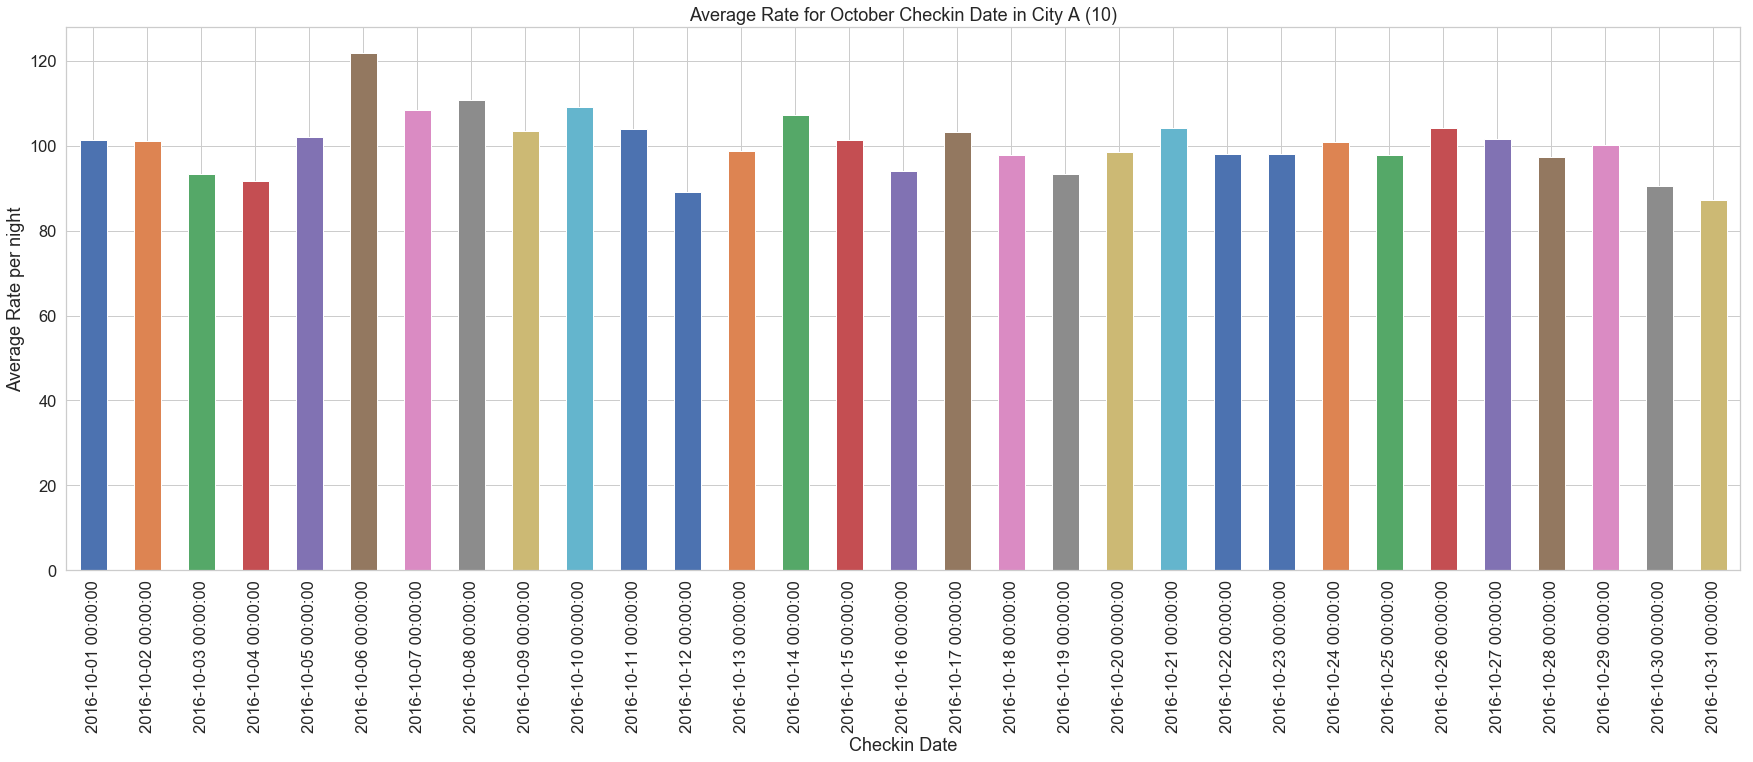

In [34]:
checkin_date_price_A_10 = exA_10['ADR_USD'].groupby([exA_10['checkin_date']]).agg('mean')
checkin_date_price_A_10

plt.figure(figsize=(30, 10))

/////////////////////////////////////////////////////////////////////////////////////////

Let's take a look at the average days that people plan ahead to book tickets! That might give us some clue on the next step to approach.

In [35]:
exB.head(1)['checkin_date'] - exB.head(1)['booking_date']
exB['booked_days_ahead'] = exB['checkin_date'] - exB['booking_date']
exB.head(5)

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,booked_days_ahead
0,1,89.860000,861894,17193,3.0,Resort,non-chain,2016-08-04,2016-10-01,2016-10-03,58 days
1,2,459.348000,195300,17193,5.0,Resort,non-chain,2016-08-05,2016-10-03,2016-10-06,59 days
2,3,183.633333,770,17193,4.0,Hotel,chain,2016-08-07,2016-10-01,2016-10-04,55 days
3,4,191.280000,3644,17193,5.0,Resort,chain,2016-08-08,2016-10-07,2016-10-08,60 days
4,5,54.860000,2030338,17193,3.0,Hotel,non-chain,2016-08-08,2016-10-02,2016-10-03,55 days


What's the average days that people booked ahead? (For City B in this case)

In [36]:
exB['booked_days_ahead'].mean()
exB['booked_days_ahead'].mean().days

13

This might be too general and not accurate. In this case, let's consider the seperate average days in each month.

In [37]:
# adding a column of bookdays_int to change datetime type date to integer type
exB['bookdays_int'] = exB['booked_days_ahead'].dt.days
exB['bookdays_int'].head()
exB['booking_month'] = exB['booking_date'].dt.month
exB['checkin_month'] = exB['checkin_date'].dt.month
exB.tail()

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,booked_days_ahead,bookdays_int,booking_month,checkin_month
4927,4928,87.246667,3278878,17193,3.0,Hotel,non-chain,2016-12-31,2016-12-31,2017-01-03,0 days,0,12,12
4928,4929,96.220000,593004,17193,3.0,Guest House / Bed & Breakfast,non-chain,2016-12-31,2016-12-31,2017-01-01,0 days,0,12,12
4929,4930,101.840000,496992,17193,4.0,Resort,non-chain,2016-12-31,2016-12-31,2017-01-01,0 days,0,12,12
4930,4931,95.920000,1735158,17193,4.0,Hotel,non-chain,2016-12-31,2016-12-31,2017-01-01,0 days,0,12,12
4931,4932,204.670000,592520,17193,4.0,Hotel,non-chain,2016-12-31,2016-12-31,2017-01-02,0 days,0,12,12


###############################################################################

In [76]:
exA.groupby([exA['booking_month']]).mean().iloc[:, [1]]
exB.groupby([exB['booking_month']]).mean().iloc[:, [1]]
exC.groupby([exC['booking_month']]).mean().iloc[:, [1]]
exD.groupby([exD['booking_month']]).mean().iloc[:, [1]]
exE.groupby([exE['booking_month']]).mean().iloc[:, [1]]
# This shows the according to different booking month, the average ADR, 

,ADR_USD
booking_month,
8,109.198550
9,110.826204
10,99.963093
11,97.994114
12,99.187117


,ADR_USD
booking_month,
8,171.681678
9,134.966002
10,112.218616
11,115.132514
12,117.272491


,ADR_USD
booking_month,
8,262.300861
9,225.826890
10,221.957653
11,223.444868
12,224.002664


,ADR_USD
booking_month,
8,198.110619
9,211.860018
10,212.867046
11,221.493098
12,232.778977


,ADR_USD
booking_month,
8,111.140738
9,151.695746
10,139.237344
11,128.232725
12,160.108523


In [77]:
exA.groupby([exA['checkin_month']]).mean().iloc[:, [1, 6]]
exB.groupby([exB['checkin_month']]).mean().iloc[:, [1, 6]]
exC.groupby([exC['checkin_month']]).mean().iloc[:, [1, 6]]
exD.groupby([exD['checkin_month']]).mean().iloc[:, [1, 6]]
exE.groupby([exE['checkin_month']]).mean().iloc[:, [1, 6]]

,ADR_USD,bookdays_int
checkin_month,,
10,100.946781,12.019395
11,99.527142,13.442493
12,101.046473,14.213453


,ADR_USD,bookdays_int
checkin_month,,
10,116.339792,12.591460
11,108.699471,12.980782
12,128.936437,15.992899


,ADR_USD,bookdays_int
checkin_month,,
10,220.981385,19.057406
11,212.940606,20.889217
12,238.112597,21.814815


,ADR_USD,bookdays_int
checkin_month,,
10,217.392117,14.127887
11,210.230484,14.607465
12,227.993227,16.616772


,ADR_USD,bookdays_int
checkin_month,,
10,143.920543,9.895215
11,120.648375,11.023121
12,153.772868,12.415857


(City B) This shows the according to different booking month, the average ADR, the average star_rating, the average days that people booked ahead. <br>
<br>
**We can see that for people booking in August, the average days they booked ahead is 48 days. This indicates that most of the people who booked in August are booking for dates after August (Maybe some dates in September)** <br>
<br>
***This data frame provided very important information on the relationship of the booking month, the days that people book ahead and the average ADR.***

In [57]:
# Add the checkin date's day of week column
exB['day_of_week'] = exB['checkin_date'].dt.day_name()
exB.head()
# for date in exB['checkin_date']:
#     print(date.weekday())

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,booked_days_ahead,bookdays_int,booking_month,checkin_month,day_of_week
0,1,89.860000,861894,17193,3.0,Resort,non-chain,2016-08-04,2016-10-01,2016-10-03,58 days,58,8,10,Saturday
1,2,459.348000,195300,17193,5.0,Resort,non-chain,2016-08-05,2016-10-03,2016-10-06,59 days,59,8,10,Monday
2,3,183.633333,770,17193,4.0,Hotel,chain,2016-08-07,2016-10-01,2016-10-04,55 days,55,8,10,Saturday
3,4,191.280000,3644,17193,5.0,Resort,chain,2016-08-08,2016-10-07,2016-10-08,60 days,60,8,10,Friday
4,5,54.860000,2030338,17193,3.0,Hotel,non-chain,2016-08-08,2016-10-02,2016-10-03,55 days,55,8,10,Sunday


In [70]:
exB.groupby([exB['booking_month'], exB['day_of_week'], exB['accommadation_type_name']]).mean().iloc[:, [1,4,5]]

ADR_USD  \
booking_month day_of_week accommadation_type_name                     
8             Friday      Hotel                          287.580000   
                          Resort                         166.533333   
                          Resort Villa                   172.540000   
              Monday      Hotel                          121.893333   
                          Resort                         272.416800   
              Saturday    Guest House / Bed & Breakfast  104.602667   
                          Hotel                          101.525556   
                          Resort                         175.465000   
                          Resort Villa                   243.510000   
              Sunday      Guest House / Bed & Breakfast   82.090000   
                          Hotel                          109.716667   
                          Private Villa                  362.180000   
                          Resort                         225.385000   
                          Resort Villa                   333.906667   
              Thursday    Bungalow                        80.560000   
                          Guest House / Bed & Breakfast   54.693333   
                          Hotel                          104.727407   
                          Resort                         100.166667   
                          Resort Villa                   172.200000   
              Tuesday     Guest House / Bed & Breakfast   94.120000   
                          Hotel                           64.580000   
                          Resort                         184.724000   
              Wednesday   Hotel                           74.080000   
                          Resort                         489.764444   
                          Resort Villa                   228.600000   
9             Friday      Apartment                      257.500000   
                          Bungalow                        94.100000   
                          Guest House / Bed & Breakfast   50.435000   
                          Hotel                          114.254917   
                          Resort                         133.206127   
...                                                             ...   
12            Saturday    Hotel                          120.064194   
                          Resort                         146.516623   
                          Resort Villa                   155.428125   
              Sunday      Bungalow                        62.056000   
                          Guest House / Bed & Breakfast   53.023077   
                          Holiday Park / Caravan Park     74.630000   
                          Hotel                           92.308627   
                          Resort                         104.120476   
                          Resort Villa                   178.889524   
                          Serviced Apartment              21.800000   
              Thursday    Apartment                      176.470000   
                          Bungalow                        80.257500   
                          Guest House / Bed & Breakfast   42.078000   
                          Hostel                          13.400000   
                          Hotel                           93.103019   
                          Resort                         117.537986   
                          Resort Villa                   157.257551   
              Tuesday     Apartment                       94.180000   
                          Bungalow                        61.684000   
                          Guest House / Bed & Breakfast   60.130556   
                          Hostel                          14.060000   
                          Hotel                           83.675379   
                          Resort                         109.991667   
                          Resort Villa                   179.510000   
             

In [115]:
exA.groupby([exA['day_of_week'], exA['accommadation_type_name']]).mean().iloc[:, [1, 4, 6]]
# Let's only look at the "Hotel" type, since we already know that the majority of records belongs to "hotel" in City A (82.26%)
exA_hotel = exA[exA['accommadation_type_name'] == 'Hotel']
exA_week = exA_hotel.groupby([exA['day_of_week']]).mean().iloc[:, [1, 4, 7]].sort_index()
exA_week = exA_week.iloc[:, [0]].sort_values(by = 'ADR_USD', ascending=False)
exA_week

,ADR_USD
day_of_week,
Friday,110.088949
Saturday,109.838897
Thursday,109.225913
Monday,103.224777
Wednesday,102.752676
Sunday,100.743228
Tuesday,100.065832


Text(0.5, 1.0, 'Average Rate for Day of Week (Checkin Date) in City A')

<Figure size 1080x1440 with 0 Axes>

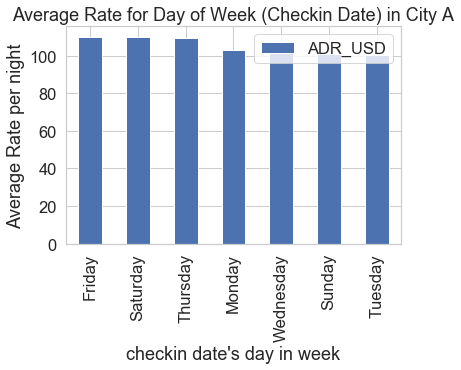

In [116]:
plt.figure(figsize=(15, 20))
exA_week.plot(kind="bar")
plt.xlabel("checkin date's day in week")
plt.ylabel("Average Rate per night");
plt.title("Average Rate for Day of Week (Checkin Date) in City A")

From the data, we can see that the average rate is higher for checkin dates that are Friday, Saturday and Thursday.  

### ***SEGMENTATION: "HOLIDAYS"***

##### What time is the holiday season? When are the holidays between 10/01/2016 - 12/31/2016??

In [128]:
t1 = date(year = 2018, month = 7, day = 12)
t1
exA.head()
firstone = date(2016, 10, 1)
firstone
exA.head()['checkin_date'] == firstone

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


0     True
1     True
2     True
3    False
4    False
Name: checkin_date, dtype: bool

##### Important Holidays (in United States): 
1. Veterans Day(Regional) 11/11/2016 Friday 
2. Thanksgiving(National) 11/24/2016 Thursday
3. Black Friday 11/25/2016 Friday
4. Christmas Day(National) 12/26/2016 Mon

##### The 3 Main Long Weekends
Taking the idea of long weekend into account, it is reasonable to add in the weekends (Fri, Sat, Sun) that comes right before and right after the important holidays, the following will be the 11 main dates for "long weekend" (that might have a higher travel rate):<br>
<br>
**Veterans**<br>
11/11/2016 Fri<br>
11/12/2016 Sat<br>
11/13/2016 Sun<br>
<br>
**Thanksgiving + Black Friday**<br>
11/24/2016 Thu<br>
11/25/2016 Fri<br>
11/26/2016 Sat<br>
11/27/2016 Sun<br>
<br>
**Christmas**<br>
12/23/2016 Fri<br>
12/24/2016 Sat<br>
12/25/2016 Sun<br>
12/26/2016 Mon<br>

In [7]:
veterans = [date(year = 2016, month = 11, day = 11), date(year = 2016, month = 11, day = 12), date(year = 2016, month = 11, day = 13)]
veterans
thanksblack = [date(year = 2016, month = 11, day = 24), date(year = 2016, month = 11, day = 25), date(year = 2016, month = 11, day = 26), date(year = 2016, month = 11, day = 27)]
thanksblack
christmas = [date(year = 2016, month = 12, day = 23), date(year = 2016, month = 12, day = 24), date(year = 2016, month = 12, day = 25), date(year = 2016, month = 12, day = 26)]
christmas

[datetime.date(2016, 12, 23),
 datetime.date(2016, 12, 24),
 datetime.date(2016, 12, 25),
 datetime.date(2016, 12, 26)]

In [8]:
# getting the records that are in the 3 big long weekend holiday (veterans, thanksblack, christmas)
exA_veterans = exA[exA['checkin_date'].isin(veterans)]
exA_veterans.tail()
exA_thanksblack = exA[exA['checkin_date'].isin(thanksblack)]
exA_thanksblack.head()
exA_christmas = exA[exA['checkin_date'].isin(christmas)]
exA_christmas.tail()

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,booking_month,checkin_month,booked_days_ahead,bookdays_int,day_of_week
21942,21943,82.46,216386,9395,3.0,Hotel,chain,2016-12-26,2016-12-26,2016-12-27,12,12,0 days,0,Monday
21952,21953,43.36,475894,9395,3.0,Serviced Apartment,non-chain,2016-12-26,2016-12-26,2016-12-27,12,12,0 days,0,Monday
21955,21956,69.16,218518,9395,3.5,Hotel,non-chain,2016-12-26,2016-12-26,2016-12-27,12,12,0 days,0,Monday
21959,21960,36.36,197996,9395,3.5,Hotel,non-chain,2016-12-26,2016-12-26,2016-12-27,12,12,0 days,0,Monday
21975,21976,36.36,197996,9395,3.5,Hotel,non-chain,2016-12-26,2016-12-26,2016-12-27,12,12,0 days,0,Monday


In [14]:
ADR_vet = exA_veterans.groupby([exA_veterans['checkin_date']]).agg('mean').iloc[:, [1, 5, 7]]
ADR_vet

,ADR_USD,booking_month,bookdays_int
checkin_date,,,
2016-11-11,101.710909,10.416185,15.202312
2016-11-12,100.342072,10.503378,14.108108
2016-11-13,96.701630,10.564444,13.671111


In [15]:
ADR_thanks = exA_thanksblack.groupby([exA_thanksblack['checkin_date']]).agg('mean').iloc[:, [1, 5, 7]]
ADR_thanks

,ADR_USD,booking_month,bookdays_int
checkin_date,,,
2016-11-24,101.703793,10.711610,15.247191
2016-11-25,104.705535,10.804281,12.214067
2016-11-26,102.865134,10.829851,12.695522
2016-11-27,94.346269,10.857798,11.775229


In [16]:
ADR_christ = exA_christmas.groupby([exA_christmas['checkin_date']]).agg('mean').iloc[:, [1, 5, 7]]
ADR_christ

,ADR_USD,booking_month,bookdays_int
checkin_date,,,
2016-12-23,103.539386,11.628159,17.931408
2016-12-24,114.733284,11.688742,15.149007
2016-12-25,97.536682,11.745455,13.950000
2016-12-26,106.873919,11.690377,16.410042


In [17]:
pd.concat([ADR_vet, ADR_thanks, ADR_christ])

,ADR_USD,booking_month,bookdays_int
checkin_date,,,
2016-11-11,101.710909,10.416185,15.202312
2016-11-12,100.342072,10.503378,14.108108
2016-11-13,96.701630,10.564444,13.671111
2016-11-24,101.703793,10.711610,15.247191
2016-11-25,104.705535,10.804281,12.214067
2016-11-26,102.865134,10.829851,12.695522
2016-11-27,94.346269,10.857798,11.775229
2016-12-23,103.539386,11.628159,17.931408
2016-12-24,114.733284,11.688742,15.149007


Take a look at the average ADR in the 3 long weekend holidays (veterans, thanksblack, christmas) in City A:

In [18]:
ADR_vet['ADR_USD'].mean()
ADR_thanks['ADR_USD'].mean()
ADR_christ['ADR_USD'].mean()

99.58487038097871

100.90518302053704

105.67081771790555

All seems to be around $100/night. 

In [79]:
exA[exA['checkin_date'] == date(2016, 10, 3)]['ADR_USD'].mean()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


93.2324644549768

In [168]:
# exA_veterans.groupby([exA_veterans['checkin_date'], exA_veterans['bookdays_int']]).agg('count')

Now Let's set a **FIXED checkin_date**, and take a look at the distribution of the booked_days_ahead/bookdays_int and the average ADR.

### Fixing on 11/11, 11/12, 11/13 (veterans long weekend)
note: only the records of "Hotel" type

In [19]:
##### 11/11/2016
exA_veterans_11 = exA_veterans[exA_veterans['checkin_date'] == veterans[0]]
exA_veterans_11_ahead_ADR = exA_veterans_11[exA_veterans_11['accommadation_type_name'] == 'Hotel'].groupby([exA_veterans['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
exA_veterans_11_ahead_ADR['booking_records'] = exA_veterans_11.groupby(exA_veterans_11['bookdays_int']).agg('count')['#']

##### 11/12/2016
exA_veterans_12 = exA_veterans[exA_veterans['checkin_date'] == veterans[1]]
exA_veterans_12_ahead_ADR = exA_veterans_12[exA_veterans_12['accommadation_type_name'] == 'Hotel'].groupby([exA_veterans['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
exA_veterans_12_ahead_ADR['booking_records'] = exA_veterans_12.groupby(exA_veterans_12['bookdays_int']).agg('count')['#']


##### 11/13/2016
exA_veterans_13 = exA_veterans[exA_veterans['checkin_date'] == veterans[2]]
exA_veterans_13_ahead_ADR = exA_veterans_13[exA_veterans_13['accommadation_type_name'] == 'Hotel'].groupby([exA_veterans['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
exA_veterans_13_ahead_ADR['booking_records'] = exA_veterans_13.groupby(exA_veterans_13['bookdays_int']).agg('count')['#']


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas wil

Text(0.5, 0, 'Booked Ahead Day Count')

Text(0, 0.5, 'Average Rate Per Night')

Text(0.5, 1.0, 'Average Rate for Different Booked Ahead Days in City A (11/11)')

<Figure size 576x432 with 0 Axes>

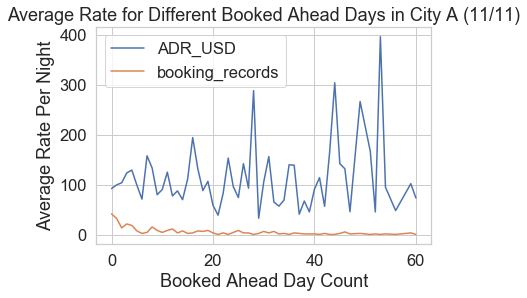

In [24]:
book_ahead_h_1111 = plt.figure(figsize=(8, 6))
exA_veterans_11_ahead_ADR[['ADR_USD', 'booking_records']].plot(kind = "line")
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Average Rate for Different Booked Ahead Days in City A (11/11)")
book_ahead_h_1111.savefig('Pictures/book_ahead_h_1111.png')

# ['ADR_USD', 'booking_records']

Text(0.5, 0, 'Booked Ahead Day Count')

Text(0, 0.5, 'Average Rate Per Night')

Text(0.5, 1.0, 'Average Rate for Different Booked Ahead Days in City A (11/12)')

<Figure size 576x432 with 0 Axes>

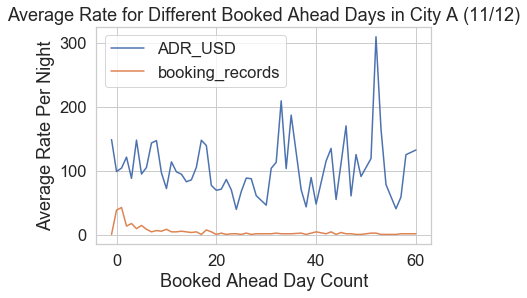

In [129]:
book_ahead_h_1112 = plt.figure(figsize=(8, 6))
exA_veterans_12_ahead_ADR[['ADR_USD', 'booking_records']].plot(kind = "line")
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Average Rate for Different Booked Ahead Days in City A (11/12)")
book_ahead_h_1112.savefig('Pictures/book_ahead_h_1112.png')

Text(0.5, 0, 'Booked Ahead Day Count')

Text(0, 0.5, 'Average Rate Per Night')

Text(0.5, 1.0, 'Average Rate for Different Booked Ahead Days in City A (11/13)')

<Figure size 576x432 with 0 Axes>

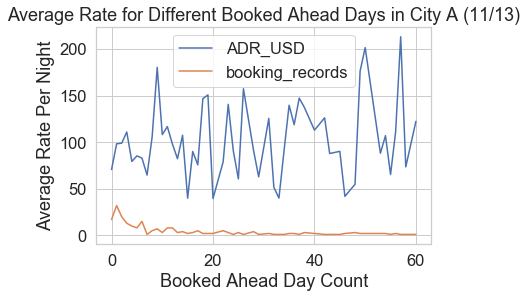

In [128]:
book_ahead_h_1113 = plt.figure(figsize=(8, 6))
exA_veterans_13_ahead_ADR[['ADR_USD', 'booking_records']].plot(kind = "line")
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Average Rate for Different Booked Ahead Days in City A (11/13)")
book_ahead_h_1113.savefig('Pictures/book_ahead_h_1113.png')

### Fixing on 11/24, 11/25, 11/26, 11/27 (Thanksgiveing/Black Friday long weekend)
note: only the records of "Hotel" type

In [26]:
##### 11/24/2016
exA_thanksblack_1124 = exA_thanksblack[exA_thanksblack['checkin_date'] == thanksblack[0]]
exA_thanksblack_1124_ahead_ADR = exA_thanksblack_1124[exA_thanksblack_1124['accommadation_type_name'] == 'Hotel'].groupby([exA_thanksblack_1124['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
exA_thanksblack_1124_ahead_ADR['booking_records'] = exA_thanksblack_1124.groupby(exA_thanksblack_1124['bookdays_int']).agg('count')['#']

##### 11/25/2016
exA_thanksblack_1125 = exA_thanksblack[exA_thanksblack['checkin_date'] == thanksblack[1]]
exA_thanksblack_1125_ahead_ADR = exA_thanksblack_1125[exA_thanksblack_1125['accommadation_type_name'] == 'Hotel'].groupby([exA_thanksblack_1125['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
exA_thanksblack_1125_ahead_ADR['booking_records'] = exA_thanksblack_1125.groupby(exA_thanksblack_1125['bookdays_int']).agg('count')['#']


##### 11/26/2016
exA_thanksblack_1126 = exA_thanksblack[exA_thanksblack['checkin_date'] == thanksblack[2]]
exA_thanksblack_1126_ahead_ADR = exA_thanksblack_1126[exA_thanksblack_1126['accommadation_type_name'] == 'Hotel'].groupby([exA_thanksblack_1126['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
exA_thanksblack_1126_ahead_ADR['booking_records'] = exA_thanksblack_1126.groupby(exA_thanksblack_1126['bookdays_int']).agg('count')['#']


##### 11/27/2016
exA_thanksblack_1127 = exA_thanksblack[exA_thanksblack['checkin_date'] == thanksblack[3]]
exA_thanksblack_1127_ahead_ADR = exA_thanksblack_1127[exA_thanksblack_1127['accommadation_type_name'] == 'Hotel'].groupby([exA_thanksblack_1127['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
exA_thanksblack_1127_ahead_ADR['booking_records'] = exA_thanksblack_1127.groupby(exA_thanksblack_1127['bookdays_int']).agg('count')['#']


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas wil

Text(0.5, 0, 'Booked Ahead Day Count')

Text(0, 0.5, 'Average Rate Per Night')

Text(0.5, 1.0, 'Average Rate for Different Booked Ahead Days in City A (11/24)')

<Figure size 576x432 with 0 Axes>

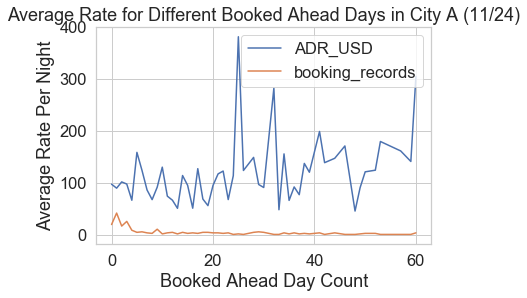

In [126]:
book_ahead_h_1124 = plt.figure(figsize=(8, 6))
exA_thanksblack_1124_ahead_ADR[['ADR_USD', 'booking_records']].plot(kind = "line")
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Average Rate for Different Booked Ahead Days in City A (11/24)")
book_ahead_h_1124.savefig('Pictures/book_ahead_h_1124.png')

Text(0.5, 0, 'Booked Ahead Day Count')

Text(0, 0.5, 'Average Rate Per Night')

Text(0.5, 1.0, 'Average Rate for Different Booked Ahead Days in City A (11/25)')

<Figure size 576x432 with 0 Axes>

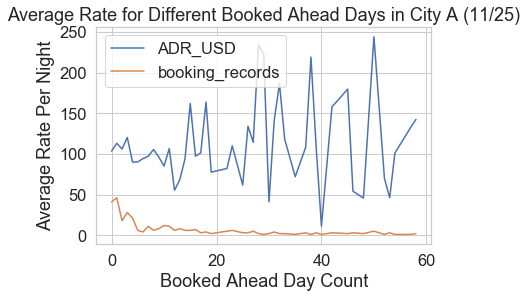

In [125]:
book_ahead_h_1125 = plt.figure(figsize=(8, 6))
exA_thanksblack_1125_ahead_ADR[['ADR_USD', 'booking_records']].plot(kind = "line")
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Average Rate for Different Booked Ahead Days in City A (11/25)")
book_ahead_h_1125.savefig('Pictures/book_ahead_h_1125.png')

Text(0.5, 0, 'Booked Ahead Day Count')

Text(0, 0.5, 'Average Rate Per Night')

Text(0.5, 1.0, 'Average Rate for Different Booked Ahead Days in City A (11/26)')

<Figure size 576x432 with 0 Axes>

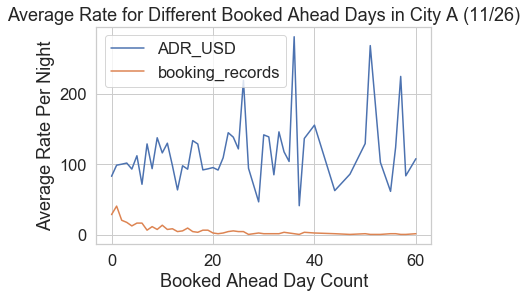

In [124]:
book_ahead_h_1126 = plt.figure(figsize=(8, 6))
exA_thanksblack_1126_ahead_ADR[['ADR_USD', 'booking_records']].plot(kind = "line")
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Average Rate for Different Booked Ahead Days in City A (11/26)")
book_ahead_h_1126.savefig('Pictures/book_ahead_h_1126.png')

Text(0.5, 0, 'Booked Ahead Day Count')

Text(0, 0.5, 'Average Rate Per Night')

Text(0.5, 1.0, 'Average Rate for Different Booked Ahead Days in City A (11/27)')

<Figure size 576x432 with 0 Axes>

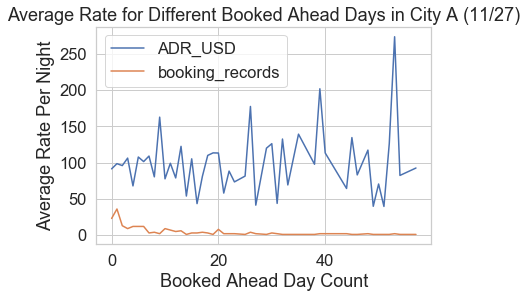

In [123]:
book_ahead_h_1127 = plt.figure(figsize=(8, 6))
exA_thanksblack_1127_ahead_ADR[['ADR_USD', 'booking_records']].plot(kind = "line")
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Average Rate for Different Booked Ahead Days in City A (11/27)")
book_ahead_h_1127.savefig('Pictures/book_ahead_h_1127.png')

### Fixing on 12/23, 12/24, 12/25, 12/26 (Christmas long weekend)
note: only the records of "Hotel" type

In [106]:
##### 12/23/2016
exA_christmas_1223 = exA_christmas[exA_christmas['checkin_date'] == christmas[0]]
exA_christmas_1223_ahead_ADR = exA_christmas_1223[exA_christmas_1223['accommadation_type_name'] == 'Hotel'].groupby([exA_christmas_1223['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
exA_christmas_1223_ahead_ADR['booking_records'] = exA_christmas_1223.groupby(exA_christmas_1223['bookdays_int']).agg('count')['#']


##### 12/24/2016
exA_christmas_1224 = exA_christmas[exA_christmas['checkin_date'] == christmas[1]]
exA_christmas_1224_ahead_ADR = exA_christmas_1224[exA_christmas_1224['accommadation_type_name'] == 'Hotel'].groupby([exA_christmas_1224['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
exA_christmas_1224_ahead_ADR['booking_records'] = exA_christmas_1224.groupby(exA_christmas_1224['bookdays_int']).agg('count')['#']


##### 12/25/2016
exA_christmas_1225 = exA_christmas[exA_christmas['checkin_date'] == christmas[2]]
exA_christmas_1225_ahead_ADR = exA_christmas_1225[exA_christmas_1225['accommadation_type_name'] == 'Hotel'].groupby([exA_christmas_1225['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
exA_christmas_1225_ahead_ADR['booking_records'] = exA_christmas_1225.groupby(exA_christmas_1225['bookdays_int']).agg('count')['#']


##### 12/26/2016
exA_christmas_1226 = exA_christmas[exA_christmas['checkin_date'] == christmas[3]]
exA_christmas_1226_ahead_ADR = exA_christmas_1226[exA_christmas_1226['accommadation_type_name'] == 'Hotel'].groupby([exA_christmas_1226['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
exA_christmas_1226_ahead_ADR['booking_records'] = exA_christmas_1226.groupby(exA_christmas_1226['bookdays_int']).agg('count')['#']



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coer

Text(0.5, 0, 'Booked Ahead Day Count')

Text(0, 0.5, 'Average Rate Per Night')

Text(0.5, 1.0, 'Average Rate for Different Booked Ahead Days in City A (12/23)')

<Figure size 576x432 with 0 Axes>

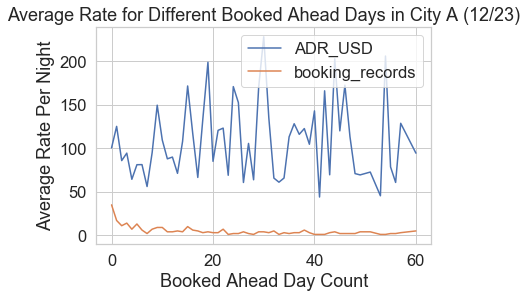

In [121]:
book_ahead_h_1223 = plt.figure(figsize=(8, 6))
exA_christmas_1223_ahead_ADR[['ADR_USD', 'booking_records']].plot(kind = "line")
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Average Rate for Different Booked Ahead Days in City A (12/23)")
book_ahead_h_1223.savefig('Pictures/book_ahead_h_1223.png')

Text(0.5, 0, 'Booked Ahead Day Count')

Text(0, 0.5, 'Average Rate Per Night')

Text(0.5, 1.0, 'Average Rate for Different Booked Ahead Days in City A (12/24)')

<Figure size 1440x1440 with 0 Axes>

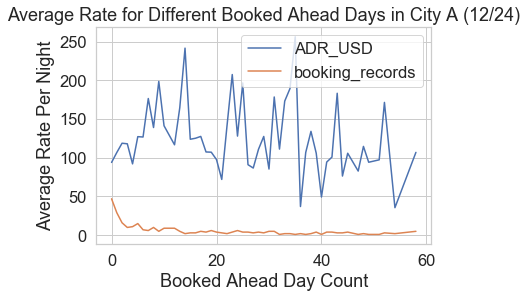

In [112]:
book_ahead_h_1224 = plt.figure(figsize=(20, 20))
exA_christmas_1224_ahead_ADR[['ADR_USD', 'booking_records']].plot(kind = "line")
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Average Rate for Different Booked Ahead Days in City A (12/24)")
book_ahead_h_1224.savefig('Pictures/book_ahead_h_1224.png')

Text(0.5, 0, 'Booked Ahead Day Count')

Text(0, 0.5, 'Average Rate Per Night')

Text(0.5, 1.0, 'Average Rate for Different Booked Ahead Days in City A (12/25)')

<Figure size 1440x1440 with 0 Axes>

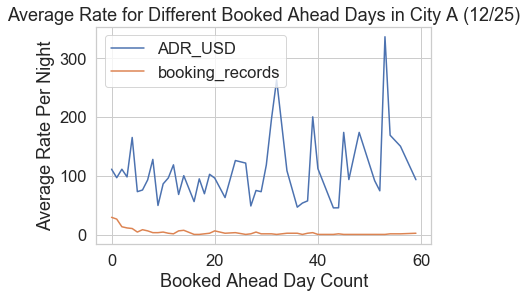

In [119]:
book_ahead_h_1225 = plt.figure(figsize=(20, 20))
exA_christmas_1225_ahead_ADR[['ADR_USD', 'booking_records']].plot(kind = "line")
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Average Rate for Different Booked Ahead Days in City A (12/25)")
book_ahead_h_1225.savefig('Pictures/book_ahead_h_1225.png')

Text(0.5, 0, 'Booked Ahead Day Count')

Text(0, 0.5, 'Average Rate Per Night')

Text(0.5, 1.0, 'Average Rate for Different Booked Ahead Days in City A (12/26)')

<Figure size 1080x720 with 0 Axes>

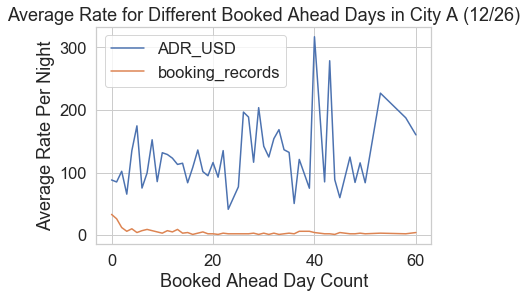

In [118]:
book_ahead_h_1226 = plt.figure(figsize=(15, 10))
exA_christmas_1226_ahead_ADR[['ADR_USD', 'booking_records']].plot(kind = "line")
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Average Rate for Different Booked Ahead Days in City A (12/26)")
book_ahead_h_1226.savefig('Pictures/book_ahead_h_1226.png')

What will be the difference if we fixed the checkin date on a regular date? (Not holiday) <br>
*In order to compare the price movement as the day approaches a **Holiday** with the price movement as the day approaches a random **Normal Day**. Let's use the following random day:*
### Random Fixed Date (10/03, 11/30, 12/10, 12/13)


In [100]:
random_date = [date(2016, 10, 3), date(2016, 11, 30), date(2016, 12, 10), date(2016, 12, 13)]
random_date

##### 10/03/2016
exA_random_1003 = exA[exA['checkin_date'] == random_date[0]]
exA_random_1003_ahead_ADR = exA_random_1003[exA_random_1003['accommadation_type_name'] == 'Hotel'].groupby([exA_random_1003['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
exA_random_1003_ahead_ADR['booking_records'] = exA_random_1003.groupby(exA_random_1003['bookdays_int']).agg('count')['#']


##### 11/30/2016
exA_random_1130 = exA[exA['checkin_date'] == random_date[1]]
exA_random_1130_ahead_ADR = exA_random_1130[exA_random_1130['accommadation_type_name'] == 'Hotel'].groupby([exA_random_1130['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
exA_random_1130_ahead_ADR['booking_records'] = exA_random_1130.groupby(exA_random_1130['bookdays_int']).agg('count')['#']


##### 12/10/2016
exA_random_1210 = exA[exA['checkin_date'] == random_date[2]]
exA_random_1210_ahead_ADR = exA_random_1210[exA_random_1210['accommadation_type_name'] == 'Hotel'].groupby([exA_random_1210['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
exA_random_1210_ahead_ADR['booking_records'] = exA_random_1210.groupby(exA_random_1210['bookdays_int']).agg('count')['#']

##### 12/13/2016
exA_random_1213 = exA[exA['checkin_date'] == random_date[3]]
exA_random_1213_ahead_ADR = exA_random_1213[exA_random_1213['accommadation_type_name'] == 'Hotel'].groupby([exA_random_1213['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
exA_random_1213_ahead_ADR['booking_records'] = exA_random_1213.groupby(exA_random_1213['bookdays_int']).agg('count')['#']

[datetime.date(2016, 10, 3),
 datetime.date(2016, 11, 30),
 datetime.date(2016, 12, 10),
 datetime.date(2016, 12, 13)]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' i

Text(0.5, 0, 'Booked Ahead Day Count')

Text(0, 0.5, 'Average Rate Per Night')

Text(0.5, 1.0, 'Average Rate for Different Booked Ahead Days in City A (10/03)')

<Figure size 576x432 with 0 Axes>

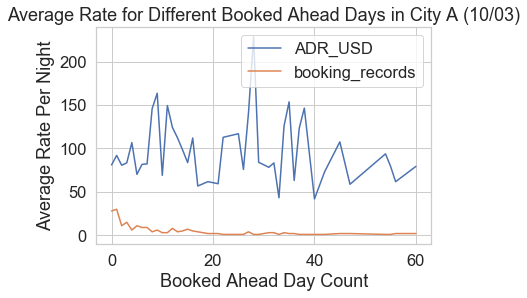

In [105]:
book_ahead_1003 = plt.figure(figsize=(8, 6))
exA_random_1003_ahead_ADR[['ADR_USD', 'booking_records']].plot(kind = "line")
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Average Rate for Different Booked Ahead Days in City A (10/03)")
book_ahead_1003.savefig('Pictures/book_ahead_1003.png')

Text(0.5, 0, 'Booked Ahead Day Count')

Text(0, 0.5, 'Average Rate Per Night')

Text(0.5, 1.0, 'Average Rate for Different Booked Ahead Days in City A (11/30)')

<Figure size 576x432 with 0 Axes>

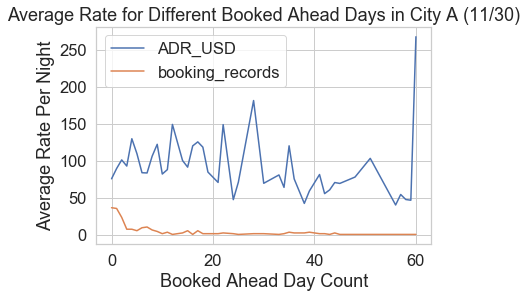

In [104]:
book_ahead_1130 = plt.figure(figsize=(8, 6))
exA_random_1130_ahead_ADR[['ADR_USD', 'booking_records']].plot(kind = "line")
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Average Rate for Different Booked Ahead Days in City A (11/30)")
book_ahead_1130.savefig('Pictures/book_ahead_1130.png')

Text(0.5, 0, 'Booked Ahead Day Count')

Text(0, 0.5, 'Average Rate Per Night')

Text(0.5, 1.0, 'Average Rate for Different Booked Ahead Days in City A (12/10)')

<Figure size 576x432 with 0 Axes>

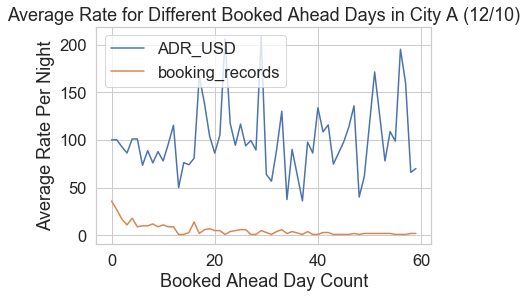

In [101]:
book_ahead_1210 = plt.figure(figsize=(8, 6))
exA_random_1210_ahead_ADR[['ADR_USD', 'booking_records']].plot(kind = "line")
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Average Rate for Different Booked Ahead Days in City A (12/10)")
book_ahead_1210.savefig('Pictures/book_ahead_1210.png')

Text(0.5, 0, 'Booked Ahead Day Count')

Text(0, 0.5, 'Average Rate Per Night')

Text(0.5, 1.0, 'Average Rate for Different Booked Ahead Days in City A (12/13)')

<Figure size 576x432 with 0 Axes>

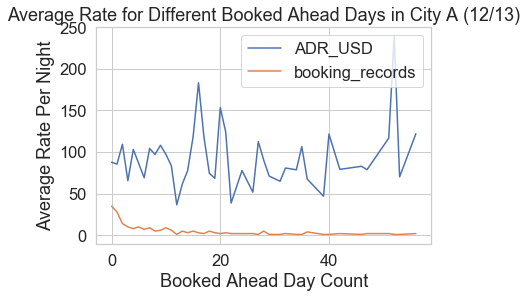

In [102]:
book_ahead_1213 = plt.figure(figsize=(8, 6))
exA_random_1213_ahead_ADR[['ADR_USD', 'booking_records']].plot(kind = "line")
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Average Rate for Different Booked Ahead Days in City A (12/13)")
book_ahead_1213.savefig('Pictures/book_ahead_1213.png')

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

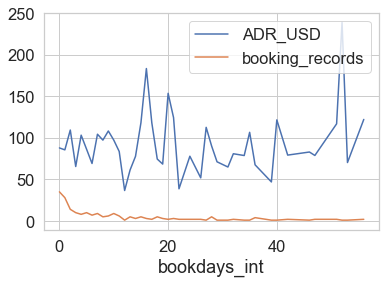

In [99]:
exA_random_1213_ahead_ADR['booking_records'] = exA_random_1213.groupby(exA_random_1213['bookdays_int']).agg('count')['#']
# exA_random_1213_ahead_ADR
plt.figure(figsize=(15, 10))
exA_random_1213_ahead_ADR[['ADR_USD', 'booking_records']].plot()



In order for the price (ADR_USD) to avoid the affect from having too many kinds of hotel (too many different rates), let's focus on 1 specific "Hotel" for now. This way maybe the plot will provide an more obvious evidence. <br>
Let's use the hotel that has the most booking records for the specific checkin date. (The most popular)

### One Hotel For Thanksgiving/Black Friday Long Weekend

In [52]:
pop_hotel_1124 = exA_thanksblack_1124.groupby(exA_thanksblack_1124['hotel_id']).agg('count')['#'].sort_values(ascending = False).head(1).index[0]
pop_hotel_1124
exA_thanksblack_1124[exA_thanksblack_1124['hotel_id'] == pop_hotel_1124].head()
len(exA_thanksblack_1124[exA_thanksblack_1124['hotel_id'] == pop_hotel_1124])


197996

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,booking_month,checkin_month,booked_days_ahead,bookdays_int,day_of_week
3393,3394,66.16,197996,9395,3.5,Hotel,non-chain,2016-10-03,2016-11-24,2016-11-25,10,11,52 days,52,Thursday
4085,4086,59.84,197996,9395,3.5,Hotel,non-chain,2016-10-05,2016-11-24,2016-11-25,10,11,50 days,50,Thursday
4389,4390,44.24,197996,9395,3.5,Hotel,non-chain,2016-10-06,2016-11-24,2016-11-25,10,11,49 days,49,Thursday
4484,4485,45.86,197996,9395,3.5,Hotel,non-chain,2016-10-07,2016-11-24,2016-11-25,10,11,48 days,48,Thursday
6578,6579,38.98,197996,9395,3.5,Hotel,non-chain,2016-10-16,2016-11-24,2016-11-25,10,11,39 days,39,Thursday


34

In [26]:
##### 11/24/2016
exA_thanksblack_1124 = exA_thanksblack[exA_thanksblack['checkin_date'] == thanksblack[0]]
pop_hotel_1124 = exA_thanksblack_1124.groupby(exA_thanksblack_1124['hotel_id']).agg('count')['#'].sort_values(ascending = False).head(1).index[0]

exA_thanksblack_1124_ahead_ADR_pophotel = exA_thanksblack_1124[exA_thanksblack_1124['hotel_id'] == pop_hotel_1124].groupby([exA_thanksblack_1124['bookdays_int']]).agg('mean').iloc[:, [1, 4, 5]]
exA_thanksblack_1124_ahead_ADR_pophotel['booking_records'] = exA_thanksblack_1124[exA_thanksblack_1124['hotel_id'] == pop_hotel_1124].groupby('bookdays_int').agg('count')['#']

# ##### 11/25/2016
exA_thanksblack_1125 = exA_thanksblack[exA_thanksblack['checkin_date'] == thanksblack[1]]
pop_hotel_1125 = exA_thanksblack_1125.groupby(exA_thanksblack_1125['hotel_id']).agg('count')['#'].sort_values(ascending = False).head(1).index[0]
pop_hotel_1125 == pop_hotel_1124
exA_thanksblack_1125.groupby(exA_thanksblack_1125['hotel_id']).agg('count')['#'].sort_values(ascending = False).head()
# exA_thanksblack_1125_ahead_ADR = exA_thanksblack_1125[exA_thanksblack_1125['accommadation_type_name'] == 'Hotel'].groupby([exA_thanksblack_1125['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
# exA_thanksblack_1125_ahead_ADR['booking_records'] = exA_thanksblack_1125.groupby(exA_thanksblack_1125['bookdays_int']).agg('count')['#']


# ##### 11/26/2016
# exA_thanksblack_1126 = exA_thanksblack[exA_thanksblack['checkin_date'] == thanksblack[2]]
# exA_thanksblack_1126_ahead_ADR = exA_thanksblack_1126[exA_thanksblack_1126['accommadation_type_name'] == 'Hotel'].groupby([exA_thanksblack_1126['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
# exA_thanksblack_1126_ahead_ADR['booking_records'] = exA_thanksblack_1126.groupby(exA_thanksblack_1126['bookdays_int']).agg('count')['#']


# ##### 11/27/2016
# exA_thanksblack_1127 = exA_thanksblack[exA_thanksblack['checkin_date'] == thanksblack[3]]
# exA_thanksblack_1127_ahead_ADR = exA_thanksblack_1127[exA_thanksblack_1127['accommadation_type_name'] == 'Hotel'].groupby([exA_thanksblack_1127['bookdays_int']]).agg('mean').iloc[:, [1, 5]]
# exA_thanksblack_1127_ahead_ADR['booking_records'] = exA_thanksblack_1127.groupby(exA_thanksblack_1127['bookdays_int']).agg('count')['#']


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  if __name__ == '__main__':


hotel_id
197996     40
21272      19
141282     16
1991354    10
1861318    10
Name: #, dtype: int64

In [10]:
exA_thanksblack_1124_ahead_ADR_pophotel

,ADR_USD,star_rating,booking_month,booking_records
bookdays_int,,,,
0,48.580000,3.5,11.0,1
1,38.352000,3.5,11.0,5
2,38.420000,3.5,11.0,1
3,35.653333,3.5,11.0,3
4,51.560000,3.5,11.0,1
8,38.300000,3.5,11.0,1
11,36.990000,3.5,11.0,2
13,51.120000,3.5,11.0,1
15,39.360000,3.5,11.0,1


### 1st Popular hotel on 11/24/2016 (hotel_id = 197996)
Although it's the 1st popular hotel on 11/24/2016, it is a low rate hotel, which might give us results that is not that significant for price movement.

This hotel that has the most booking turns out to have a very low average ADR! And the star rating is also not bad (3.5)
This might indicate that this hotel gave out a lot of discount? cut a lot of price on this day?
Let's check the average ADR of this hotel in general to make sure.

In [11]:
exA[exA['hotel_id'] == pop_hotel_1124]['ADR_USD'].mean()

44.258331466965274

In [15]:
exA[exA['hotel_id'] == pop_hotel_1124]['ADR_USD'].head()
# .plot(kind = 'line')

21    42.10
53    43.36
60    41.70
67    40.84
68    53.52
Name: ADR_USD, dtype: float64

This result tells us that no matter if it's holiday or not, this hotel provides a low stable rate. Therefore, the previous idea of giving out more discounts for holidays for this hotel is not correct.

Text(0.5, 1.0, 'Price Movement for Different Booked Ahead Days (City A, 11/24, hotel_id: 197996)')

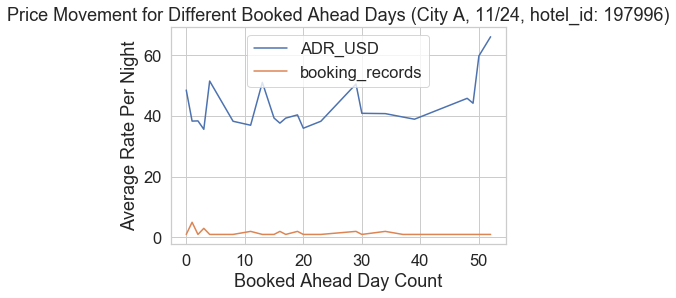

In [52]:
exA_thanksblack_1124_ahead_ADR_pophotel[['ADR_USD', 'booking_records']].plot()
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Price Movement for Different Booked Ahead Days (City A, 11/24, hotel_id: 197996)")

No obvious result. Maybe it's because this is a hotel that doesn't have a lot of price change.
In this case, let's try another holiday with another hotel. 

### One Hotel For Christmas Long Weekend

In [47]:
##### 12/23/2016
exA_christmas_1223 = exA_christmas[exA_christmas['checkin_date'] == christmas[0]]
pop_hotel_1223 = exA_christmas_1223.groupby(exA_christmas_1223['hotel_id']).agg('count')['#'].sort_values(ascending = False).head(1).index[0]
pop_hotel_1223
# Still the SAME HOTEL: hotel_id = 197996, it's a low rate Hotel! 
#Let's try the 2nd popular hotel and see if there is a more obvious differnece in the price
pop_hotel_1223_2nd = exA_christmas_1223.groupby(exA_christmas_1223['hotel_id']).agg('count')['#'].sort_values(ascending = False).index[1]
exA_christmas_1223_ahead_ADR_pophotel_2nd = exA_christmas_1223[exA_christmas_1223['hotel_id'] == pop_hotel_1223_2nd].groupby([exA_christmas_1223['bookdays_int']]).agg('mean').iloc[:, [1, 4, 5]]
exA_christmas_1223_ahead_ADR_pophotel_2nd['booking_records'] = exA_christmas_1223[exA_christmas_1223['hotel_id'] == pop_hotel_1223_2nd].groupby('bookdays_int').agg('count')['#']
exA_christmas_1223_ahead_ADR_pophotel_2nd

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


,ADR_USD,star_rating,booking_month,booking_records
bookdays_int,,,,
1,138.840000,4.0,12.0,1
2,122.740000,4.0,12.0,2
3,114.520000,4.0,12.0,1
5,110.140000,4.0,12.0,1
8,123.640000,4.0,12.0,2
10,125.806667,4.0,12.0,3
15,117.933333,4.0,12.0,1
16,123.980000,4.0,12.0,1
17,108.220000,4.0,12.0,1


### 2nd Popular hotel on 12/23/2016 (hotel_id = 21272)
Now we have the 2nd poplular hotel on 12/23/2016. This is a hotel that has a higher rate compare to the previous one. This might give us a more obvious affect in the price movement.

Text(0.5, 1.0, 'Price Movement for Different Booked Ahead Days (City A, 12/23, hotel_id: 21272)')

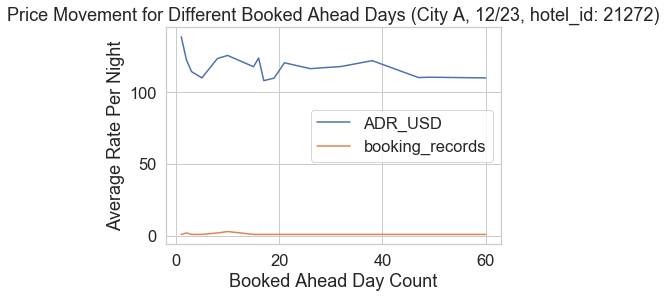

In [55]:
exA_christmas_1223_ahead_ADR_pophotel_2nd[['ADR_USD', 'booking_records']].plot(kind = 'line')
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Price Movement for Different Booked Ahead Days (City A, 12/23, hotel_id: 21272)")

**There is a obvious increase in price when the booking date approaches the checkin date (12/23)** <br><br>
Let's take a look at another day.

### 2nd Popular hotel on 12/25/2016 (hotel_id = 21272)

In [58]:
##### 12/25/2016
exA_christmas_1225 = exA_christmas[exA_christmas['checkin_date'] == christmas[2]]
pop_hotel_1225 = exA_christmas_1225.groupby(exA_christmas_1225['hotel_id']).agg('count')['#'].sort_values(ascending = False).head(1).index[0]
pop_hotel_1225
exA_christmas_1225.groupby(exA_christmas_1225['hotel_id']).agg('count')['#'].sort_values(ascending = False).head()
# Still the SAME HOTEL: hotel_id = 197996, it's a low rate Hotel! 
#Let's try the 2nd popular hotel and see if there is a more obvious differnece in the price

pop_hotel_1223_2nd = exA_christmas_1223.groupby(exA_christmas_1223['hotel_id']).agg('count')['#'].sort_values(ascending = False).index[1]

exA_christmas_1225_ahead_ADR_pophotel_2nd = exA_christmas_1225[exA_christmas_1225['hotel_id'] == pop_hotel_1223_2nd].groupby([exA_christmas_1225['bookdays_int']]).agg('mean').iloc[:, [1, 4, 5]]
exA_christmas_1225_ahead_ADR_pophotel_2nd['booking_records'] = exA_christmas_1225[exA_christmas_1225['hotel_id'] == pop_hotel_1223_2nd].groupby('bookdays_int').agg('count')['#']
exA_christmas_1225_ahead_ADR_pophotel_2nd

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


,ADR_USD,star_rating,booking_month,booking_records
bookdays_int,,,,
0,121.500000,4.0,12.0,1
1,117.680000,4.0,12.0,2
2,129.880000,4.0,12.0,1
3,125.533333,4.0,12.0,2
6,121.960000,4.0,12.0,1
8,104.046667,4.0,12.0,1
10,110.940000,4.0,12.0,1
11,119.140000,4.0,12.0,1
12,119.080000,4.0,12.0,1


Text(0.5, 1.0, 'Price Movement for Different Booked Ahead Days (City A, 12/25, hotel_id: 21272)')

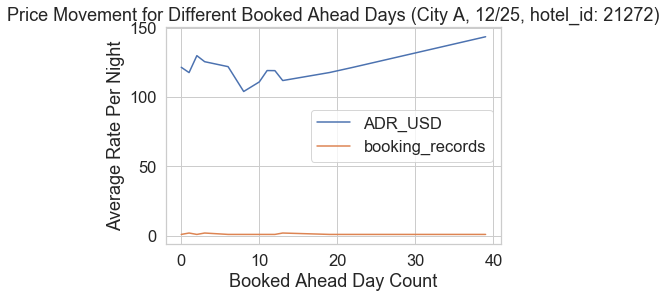

In [59]:
exA_christmas_1225_ahead_ADR_pophotel_2nd[['ADR_USD', 'booking_records']].plot(kind = 'line')
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Price Movement for Different Booked Ahead Days (City A, 12/25, hotel_id: 21272)")

### 3rd Popular hotel on 12/23/2016 (hotel_id = 297388)

In [67]:
##### 12/23/2016
exA_christmas_1223 = exA_christmas[exA_christmas['checkin_date'] == christmas[0]]
pop_hotel_1223_3rd = exA_christmas_1223.groupby(exA_christmas_1223['hotel_id']).agg('count')['#'].sort_values(ascending = False).index[2]
pop_hotel_1223_3rd

# exA_christmas_1223_ahead_ADR_pophotel_3rd = exA_christmas_1223[exA_christmas_1223['hotel_id'] == pop_hotel_1223_3rd].groupby([exA_christmas_1223['bookdays_int']]).agg('mean').iloc[:, [1, 4, 5]]
# exA_christmas_1223_ahead_ADR_pophotel_3rd['booking_records'] = exA_christmas_1223[exA_christmas_1223['hotel_id'] == pop_hotel_1223_3rd].groupby('bookdays_int').agg('count')['#']
# exA_christmas_1223_ahead_ADR_pophotel_3rd

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


297388

Text(0.5, 1.0, 'Price Movement for Different Booked Ahead Days (City A, 12/23, hotel_id: 297388)')

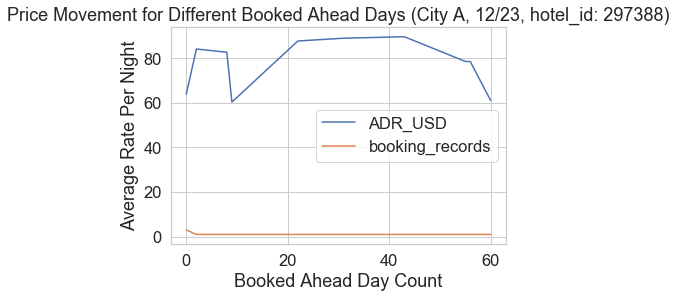

In [68]:
exA_christmas_1223_ahead_ADR_pophotel_3rd[['ADR_USD', 'booking_records']].plot(kind = 'line')
plt.xlabel("Booked Ahead Day Count")
plt.ylabel("Average Rate Per Night");
plt.title("Price Movement for Different Booked Ahead Days (City A, 12/23, hotel_id: 297388)")

The plot seems so weird because the booking amount for this hotel (297388) on that day doesn't have a lot of data. Therefore very sensitive for small change.